In [1]:
import pandas as pd
data = pd.read_csv('data.csv')

In [3]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Phân tích và tiền xử lý dữ liệu

In [2]:
data['EdLevel'].unique()

array(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'], dtype=object)

In [4]:
data.isna().sum()

ConvertedCompYearly         0
Age                         8
YearsCode                  11
YearsCodePro               20
Country                     0
EdLevel                     0
DevType                     4
Employment                  0
LanguageHaveWorkedWith      0
DatabaseHaveWorkedWith      0
PlatformHaveWorkedWith      0
WebframeHaveWorkedWith      0
ToolsTechHaveWorkedWith     0
dtype: int64

**Điền giá trị thiếu cho cột YearsCodePro và YearsCode**

Trích số từ các cột YearsCode và YearsCodePro

In [5]:
data['YearsCodePro'] = data['YearsCodePro'].str.extract(r'(\d+)') 
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')  
max(data['YearsCodePro'])

50.0

In [6]:
data['YearsCode'] = data['YearsCode'].str.extract(r'(\d+)') 
data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')  

In [7]:
data[data['YearsCode'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith
114,48000.0,25-34 years old,NaN,NaN,Germany,"Associate degree (A.A., A.S., etc.)","Developer, full-stack",Employed full-time,"['C#', 'HTML/CSS', 'JavaScript', 'Node.js', 'P...",['MariaDB'],[],"['Angular', 'ASP.NET Core ']",['Git']
181,95520.0,35-44 years old,NaN,NaN,Denmark,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, desktop or enterprise applications;...",Employed full-time,"['COBOL', 'Java', 'JavaScript', 'PHP', 'Python...","['IBM DB2', 'MySQL', 'SQLite']",[],"['Angular', 'Flask', 'Spring']","['Docker', 'Git']"
620,77832.0,35-44 years old,NaN,NaN,Italy,"Secondary school (e.g. American high school, G...","Developer, full-stack;Developer, game or graph...",Employed full-time,"['Assembly', 'C', 'C++', 'Delphi', 'Node.js', ...","['Elasticsearch', 'Microsoft SQL Server', 'SQL...",[],[],[]
893,19572.0,18-24 years old,NaN,NaN,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",Employed full-time,['Java'],"['MySQL', 'PostgreSQL']",['AWS'],[],['Git']
988,225001.0,18-24 years old,NaN,NaN,United States of America,"Professional degree (JD, MD, etc.)","Developer, mobile;Engineer, data;Other (please...",Employed full-time,"['Assembly', 'C', 'C++', 'JavaScript']",[],[],[],[]
1432,99708.0,25-34 years old,NaN,5.0,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, full-time","['Bash/Shell', 'Clojure', 'SQL']","['Elasticsearch', 'PostgreSQL', 'Firebase Real...","['AWS', 'Firebase']",[],['Docker']
1434,5256.0,18-24 years old,NaN,NaN,Bangladesh,"Associate degree (A.A., A.S., etc.)","Developer, back-end","Employed, full-time","['Go', 'JavaScript', 'Rust']","['MySQL', 'PostgreSQL']",['AWS'],"['Express', 'Node.js', 'React.js']","['Docker', 'npm']"
2870,12000.0,35-44 years old,NaN,20.0,Pakistan,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Blockchain,"Employed, full-time","['Python', 'Rust', 'SQL']",['Oracle'],[],[],"['Cargo', 'Pip', 'Yarn']"
3265,41697.0,25-34 years old,NaN,9.0,Czech Republic,"Secondary school (e.g. American high school, G...","Developer, front-end","Independent contractor, freelancer, or self-em...","['HTML/CSS', 'TypeScript']",['PostgreSQL'],['Amazon Web Services (AWS)'],"['Deno', 'Node.js', 'React']","['npm', 'Vite']"
3301,12342.0,18-24 years old,NaN,1.0,Ukraine,Some college/university study without earning ...,Student,"Student, full-time;Employed, part-time","['Assembly', 'Bash/Shell (all shells)', 'C', '...","['Cloud Firestore', 'Firebase Realtime Databas...","['Amazon Web Services (AWS)', 'Firebase', 'Net...","['FastAPI', 'Flask', 'Next.js', 'Node.js', 'Re...","['APT', 'Bun', 'Docker', 'Make', 'npm', 'Pip',..."


Giả định YearsCode có giá trị NaN bằng mean YearsCode của tất cả những người có cùng YearsCodePro. Tương tự ngược lại với YearsCodePro bị NaN

In [ ]:
mean_years_code_pro = data.groupby('YearsCode')['YearsCodePro'].transform(lambda x: x.mean())

data.loc[data['YearsCodePro'].isna() & data['YearsCode'].notna(), 'YearsCodePro'] = data.loc[
    data['YearsCodePro'].isna() & data['YearsCode'].notna(), 'YearsCode'].map(
    mean_years_code_pro
)

print(data['YearsCodePro'].isna().sum()) 


7


In [ ]:
mean_years_code = data.groupby('YearsCodePro')['YearsCode'].transform(lambda x: x.mean())

data.loc[data['YearsCode'].isna() & data['YearsCodePro'].notna(), 'YearsCode'] = data.loc[
    data['YearsCode'].isna() & data['YearsCodePro'].notna(), 'YearsCodePro'].map(
    data.groupby('YearsCodePro')['YearsCode'].mean()
)


Phần còn lại lại là những data không có cả YearsCode và YearsCodePro, xử lý kết quả kém hơn bỏ đi -> bỏ

In [9]:
data = data.dropna(subset=['YearsCode'])

In [11]:
len(data[data['YearsCodePro'].isna()])

0

Trích tuổi từ nhóm, Age là nhóm tuổi

In [ ]:
data['Age'].unique()

In [12]:
len(data[data['Age'].isna()])

8

Đã thử xử lý theo cách bên YearsCode nhưng hiệu quả kém hơn và chỉ có 8 dòng -> bỏ

Lấy đại diện (categories) cho Age là trung bình đầu và cuối nhóm tuổi

In [ ]:
import re

def extract_average_age(age_str):
    if isinstance(age_str, str):
        match = re.match(r'(\d+)-(\d+)', age_str)
        if match:
            lower, upper = map(int, match.groups())
            if ((lower + upper)/2) %2==0 :
                return ((lower + upper) / 2)
            else:
                return (lower+upper)/2
    return None 

data['Age'] = data['Age'].apply(extract_average_age)


In [14]:
# average_age_by_years_code = data.groupby('YearsCode')['Age'].transform(lambda x: x.mean())

# # Chỉ thay thế các giá trị NaN trong cột Age
# data.loc[data['Age'].isna(), 'Age'] = data.loc[data['Age'].isna(), 'YearsCode'].map(
#     data.groupby('YearsCode')['Age'].mean()
# )


In [15]:
len(data[data['Age'].isna()])

35

In [16]:
data= data.dropna(subset = ['Age'])

In [17]:
# Shuffle các hàng trong DataFrame
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
len(data[data['YearsCodePro'].isna()])


0

In [20]:
data = data.dropna(subset=['YearsCodePro'])

In [21]:
data[data['EdLevel'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [22]:
data[data['Country'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [23]:
data[data['Employment'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [24]:
data.dtypes

ConvertedCompYearly        float64
Age                        float64
YearsCode                  float64
YearsCodePro               float64
Country                     object
EdLevel                     object
DevType                     object
Employment                  object
LanguageHaveWorkedWith      object
DatabaseHaveWorkedWith      object
PlatformHaveWorkedWith      object
WebframeHaveWorkedWith      object
ToolsTechHaveWorkedWith     object
dtype: object

In [ ]:
data = data.dropna() 

**Vẽ biểu đồ và phân tích tương quan giữa các đặc trưng với Salary**

In [26]:
data

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith
0,51555.0,50.0,39.0,28.0,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, part-time","['C#', 'PHP', 'SQL', 'Visual Basic (.Net)']","['Firebird', 'Microsoft SQL Server', 'SQLite']",['Microsoft Azure'],"['ASP.NET', 'jQuery']",['NuGet']
1,110570.0,40.0,10.0,6.0,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Project manager,"Employed, full-time;Independent contractor, fr...","['Bash/Shell (all shells)', 'PowerShell', 'Pyt...",[],['Amazon Web Services (AWS)'],[],['Chocolatey']
2,44978.0,30.0,10.0,6.0,Greece,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end","Employed, full-time","['Go', 'Python', 'SQL']",['PostgreSQL'],['Microsoft Azure'],['Django'],"[""LLVM's Clang"", 'Make']"
3,8292.0,30.0,15.0,8.0,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, embedded applications or devices",Employed full-time,"['Assembly', 'C', 'C#', 'C++', 'HTML/CSS', 'Ja...","['Microsoft SQL Server', 'MySQL', 'Oracle', 'P...",['AWS'],"['jQuery', 'React.js', 'Spring']","['Git', 'Unity 3D', 'Xamarin', 'Yarn']"
4,82000.0,40.0,25.0,18.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end","Employed, full-time","['Bash/Shell (all shells)', 'HTML/CSS', 'Java'...","['MySQL', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Digital Ocean',...","['Drupal', 'Node.js', 'Svelte', 'Vue.js', 'Wor...","['Composer', 'Docker', 'Homebrew', 'npm', 'Vit..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,68832.0,30.0,11.0,1.0,Denmark,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end","Employed, full-time","['JavaScript', 'TypeScript']",['Cloud Firestore'],"['Firebase', 'Google Cloud']",['Angular'],"['Homebrew', 'npm']"
3950,127000.0,50.0,40.0,22.0,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, front-end;Developer, back-end;Devel...","Employed, full-time","['C', 'C++', 'JavaScript', 'SQL']","['MariaDB', 'SQLite']",[],[],['Homebrew']
3951,13176.0,21.5,3.0,1.0,Indonesia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end",Employed full-time,"['HTML/CSS', 'JavaScript', 'Node.js', 'TypeScr...",[],"['AWS', 'Heroku']","['Django', 'Express', 'React.js', 'Vue.js']","['Docker', 'Git']"
3952,97143.0,40.0,24.0,22.0,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, full-time","['Bash/Shell (all shells)', 'C#', 'HTML/CSS', ...","['Dynamodb', 'Microsoft SQL Server', 'PostgreS...",['Amazon Web Services (AWS)'],"['Angular', 'ASP.NET', 'ASP.NET CORE', 'jQuery']","['Docker', 'Kubernetes', 'MSBuild', 'npm', 'Nu..."


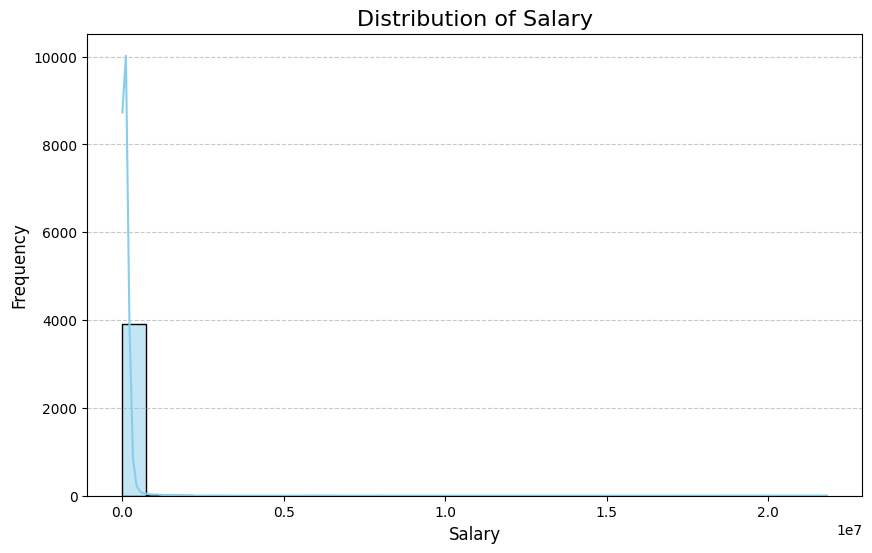

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ConvertedCompYearly'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:

data = data.rename(columns={'ConvertedCompYearly': 'Salary'})
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
if lower_bound < 12000:
    lower_bound = 12000

In [29]:
data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]


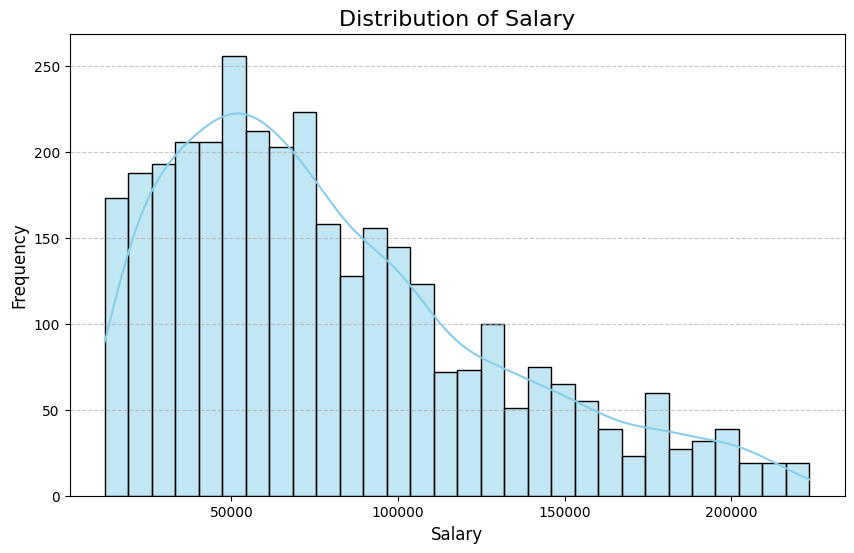

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12336\780036900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')


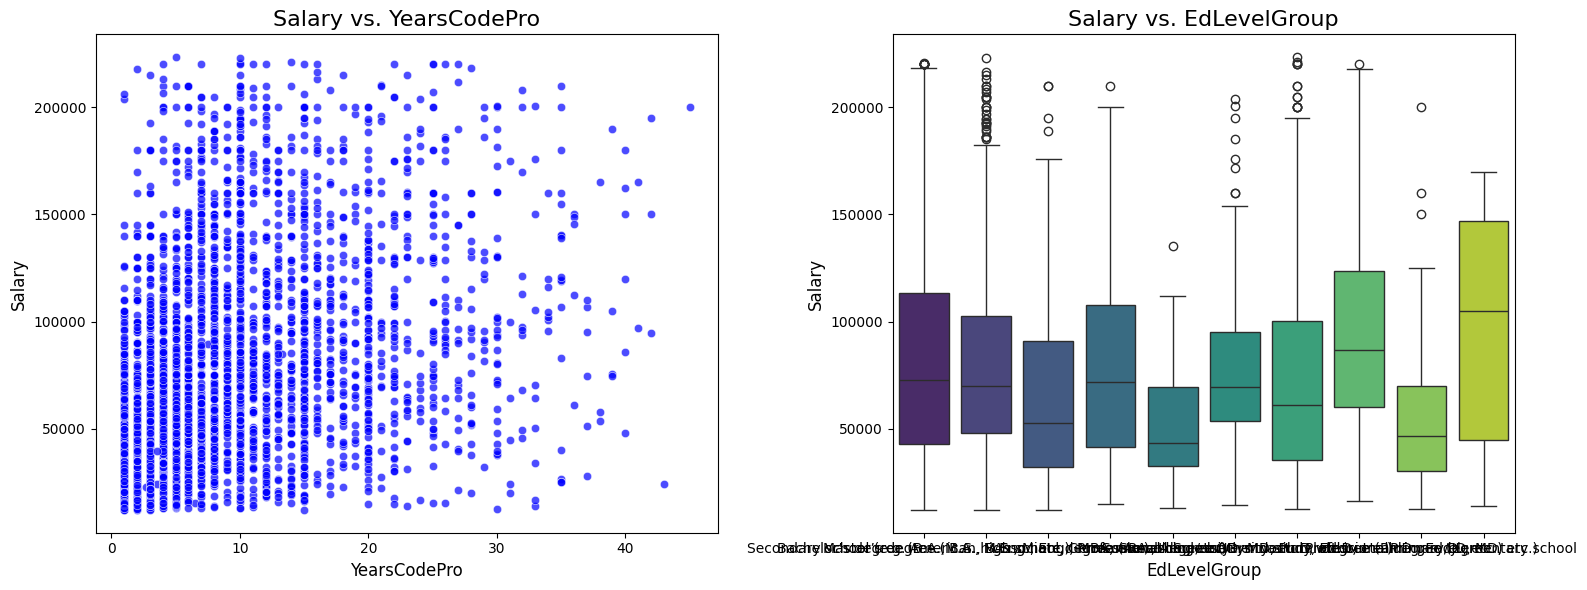

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=data['YearsCodePro'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCodePro', fontsize=16)
axes[0].set_xlabel('YearsCodePro', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)
sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:

invalid_experience = (data['YearsCode'] > data['Age'] - 15) | \
                     (data['YearsCode'] < 0) | \
                     (data['YearsCode'] > 50)|\
                    (data['YearsCodePro'] > data['YearsCode'])

print(f"Số hàng bất hợp lý trong YearsCodePro: {invalid_experience.sum()}")
data = data[~invalid_experience]

Số hàng bất hợp lý trong YearsCodePro: 674


In [32]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [34]:
data['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [35]:
edlevel_map = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate degree',
    'Something else': 'Other',
    'Some college/university study without earning a degree': 'Some college',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional degree',
    'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
    'Professional degree (JD, MD, etc.)': 'Professional degree',
    'Primary/elementary school': 'Primary school'
}

# Thay thế các giá trị trong cột EdLevel bằng nhóm tương ứng
data['EdLevel'] = data['EdLevel'].map(edlevel_map)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12336\2055916472.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')


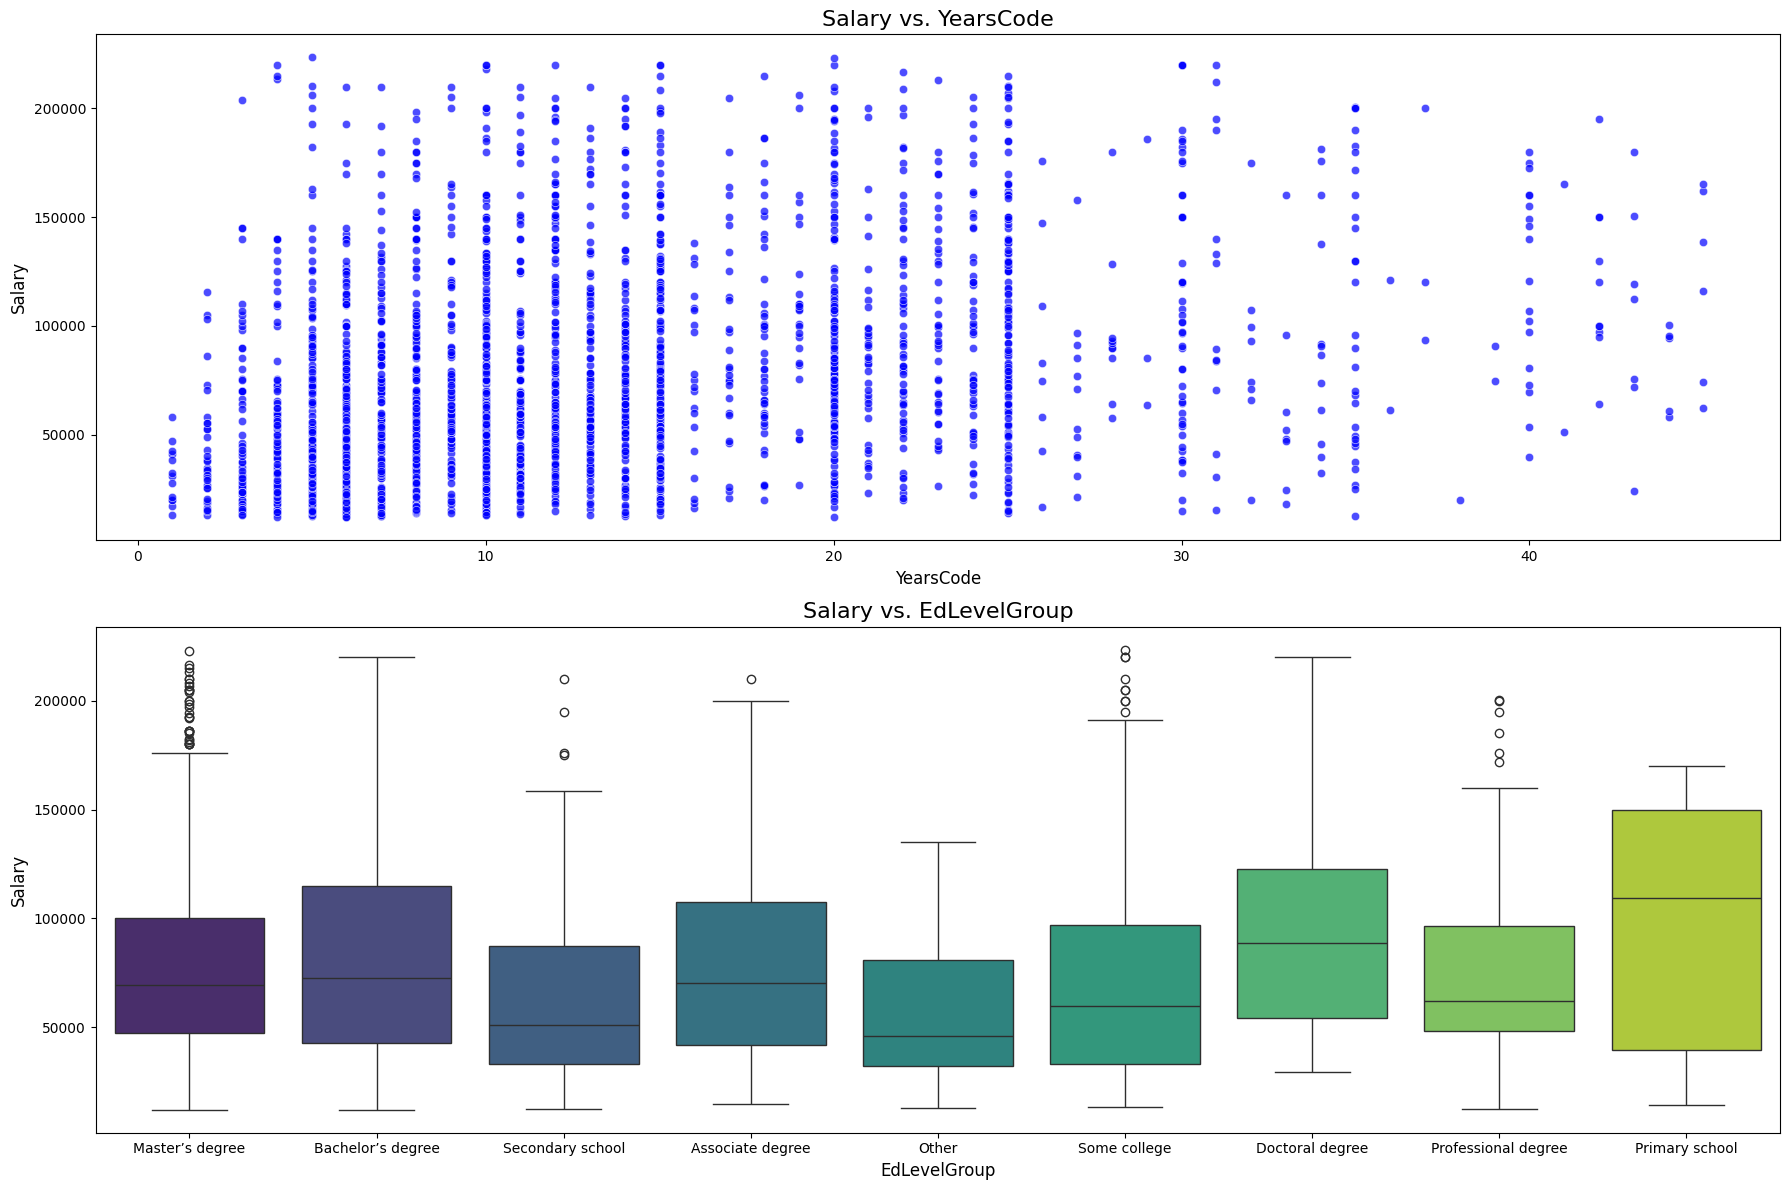

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))  # Chỉnh số lượng hàng và cột
sns.scatterplot(x=data['YearsCode'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCode', fontsize=16)
axes[0].set_xlabel('YearsCode', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)

sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


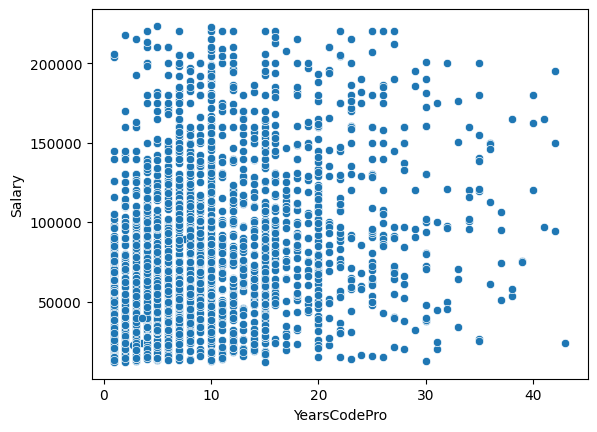

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='YearsCodePro', y='Salary', data=data)
plt.show()


In [38]:
data['EdLevel'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Secondary school',
       'Associate degree', 'Other', 'Some college', 'Doctoral degree',
       'Professional degree', 'Primary school'], dtype=object)

Số dòng có EdLevel là primary school quá ít (12 chia 8:1:1) và giá trị chênh lệch giữa các thành phần rất lớn -> bỏ

In [ ]:
Kiểm tra các giá trị lương trong nhóm "Primary school"
primary_school_salary = data[data['EdLevel'] == 'Primary school']['Salary']
primary_school_salary.describe()


In [ ]:
primary_school_salary = data[data['EdLevel'] == 'Primary school']

data = data[~((data['EdLevel'] == 'Primary school'))] 


C:\Users\Admin\AppData\Local\Temp\ipykernel_12336\1621175164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EdLevel', y='Salary', data=data, order=salary_by_edlevel.index, palette='viridis')


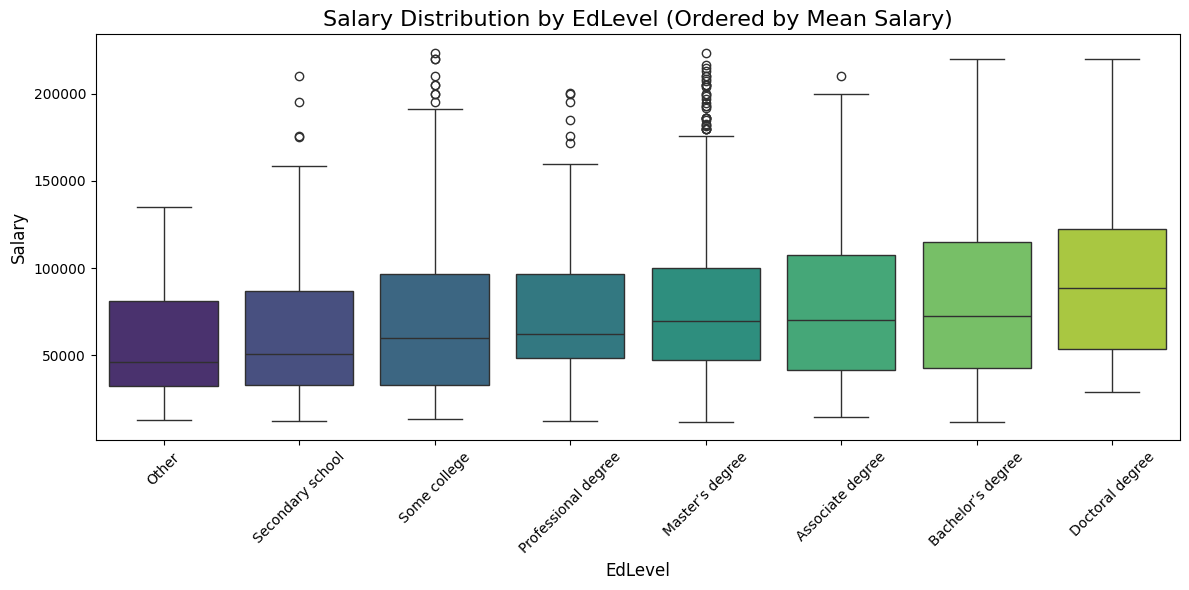

In [40]:
salary_by_edlevel = data.groupby('EdLevel')['Salary'].mean().sort_values()

# Vẽ biểu đồ boxplot với thứ tự các nhóm đã sắp xếp
plt.figure(figsize=(12, 6))
sns.boxplot(x='EdLevel', y='Salary', data=data, order=salary_by_edlevel.index, palette='viridis')
plt.title('Salary Distribution by EdLevel (Ordered by Mean Salary)', fontsize=16)
plt.xlabel('EdLevel', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
# Kiểm tra số lượng mẫu trong mỗi nhóm
data['EdLevel'].value_counts()


EdLevel
Bachelor’s degree      1242
Master’s degree         744
Some college            300
Secondary school        114
Associate degree        102
Professional degree      85
Doctoral degree          38
Other                    27
Name: count, dtype: int64

In [42]:
# data[data['EdLevel'] == 'Primary school']['Salary']

In [43]:
# Kiểm tra các giá trị lương trong nhóm "Primary school"
# primary_school_salary = data[data['EdLevel'] == 'Primary school']['Salary']
# primary_school_salary.describe()


In [44]:
salary_by_edlevel = data.groupby('EdLevel')['Salary'].describe()
salary_by_edlevel

,count,mean,std,min,25%,50%,75%,max
EdLevel,,,,,,,,
Associate degree,102.0,79748.382353,47576.548564,14604.0,41902.25,70045.0,107567.0,210000.0
Bachelor’s degree,1242.0,82658.208535,50775.170137,12072.0,42593.25,72626.0,115000.0,220000.0
Doctoral degree,38.0,97758.131579,52367.213319,29149.0,53971.00,88816.0,122500.0,220000.0
Master’s degree,744.0,78480.745968,43734.964513,12000.0,47352.00,69459.0,100323.5,223054.0
Other,27.0,55973.370370,33790.135030,12897.0,32217.00,46071.0,80958.5,135100.0
Professional degree,85.0,76790.517647,46723.896250,12468.0,48407.00,62069.0,96666.0,200550.0
Secondary school,114.0,63673.719298,42282.938751,12264.0,32861.00,50871.5,87075.5,210000.0
Some college,300.0,72597.640000,50632.357593,13427.0,32849.00,59893.0,96706.5,223449.0


In [45]:
def remove_outliers(group):
    # Tính IQR (Interquartile Range) cho mỗi nhóm
    Q1 = group['Salary'].quantile(0.25)
    Q3 = group['Salary'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Lọc dữ liệu: chỉ giữ lại các giá trị trong phạm vi IQR
    filtered_group = group[(group['Salary'] >= lower_bound) & (group['Salary'] <= upper_bound)]
    
    return filtered_group

# Áp dụng hàm lọc ngoại lệ cho từng nhóm 'EdLevel'
data_filtered = data.groupby('EdLevel').apply(remove_outliers).reset_index(drop=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12336\471623427.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_filtered = data.groupby('EdLevel').apply(remove_outliers).reset_index(drop=True)


In [46]:
data = data_filtered

In [47]:
data['DevType'] = data['DevType'].str.replace(",", "").str.strip()

# Bước 2: Nếu có dấu chấm phẩy, split thành danh sách
data['DevType'] = data['DevType'].str.split(";")

In [48]:
data.drop(data[data['Employment'].apply(lambda x: "Not employed but looking for work" in x)].index, inplace=True)


In [49]:
data[data['Employment'].apply(lambda x: "Not employed but looking for work" in x)]

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [50]:
data['DevType']

0                                  [Developer full-stack]
1                                   [Developer front-end]
2                                  [Developer full-stack]
3                 [Developer mobile, Engineering manager]
4                                  [Developer full-stack]
                              ...                        
2595    [Developer full-stack, Developer back-end, Dev...
2596       [Developer desktop or enterprise applications]
2597    [Developer front-end, Developer full-stack, St...
2598    [Developer front-end, Developer full-stack, De...
2599      [Developer full-stack, Other (please specify):]
Name: DevType, Length: 2600, dtype: object

In [51]:
data['Employment']

0                                     Employed, full-time
1                                     Employed, full-time
2                                      Employed full-time
3                                      Employed full-time
4       Independent contractor, freelancer, or self-em...
                              ...                        
2595                                  Employed, full-time
2596                                  Employed, full-time
2597                                   Employed full-time
2598                                  Employed, full-time
2599                                   Employed full-time
Name: Employment, Length: 2600, dtype: object

In [52]:
data['Employment'] = data['Employment'].str.replace(",", "").str.strip()

# Bước 2: Nếu có dấu chấm phẩy, split thành danh sách
data['Employment'] = data['Employment'].str.split(";")

In [53]:
data['Employment']

0                                    [Employed full-time]
1                                    [Employed full-time]
2                                    [Employed full-time]
3                                    [Employed full-time]
4       [Independent contractor freelancer or self-emp...
                              ...                        
2595                                 [Employed full-time]
2596                                 [Employed full-time]
2597                                 [Employed full-time]
2598                                 [Employed full-time]
2599                                 [Employed full-time]
Name: Employment, Length: 2600, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_12336\3121201441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='DevType', y='Salary', palette="Set2")


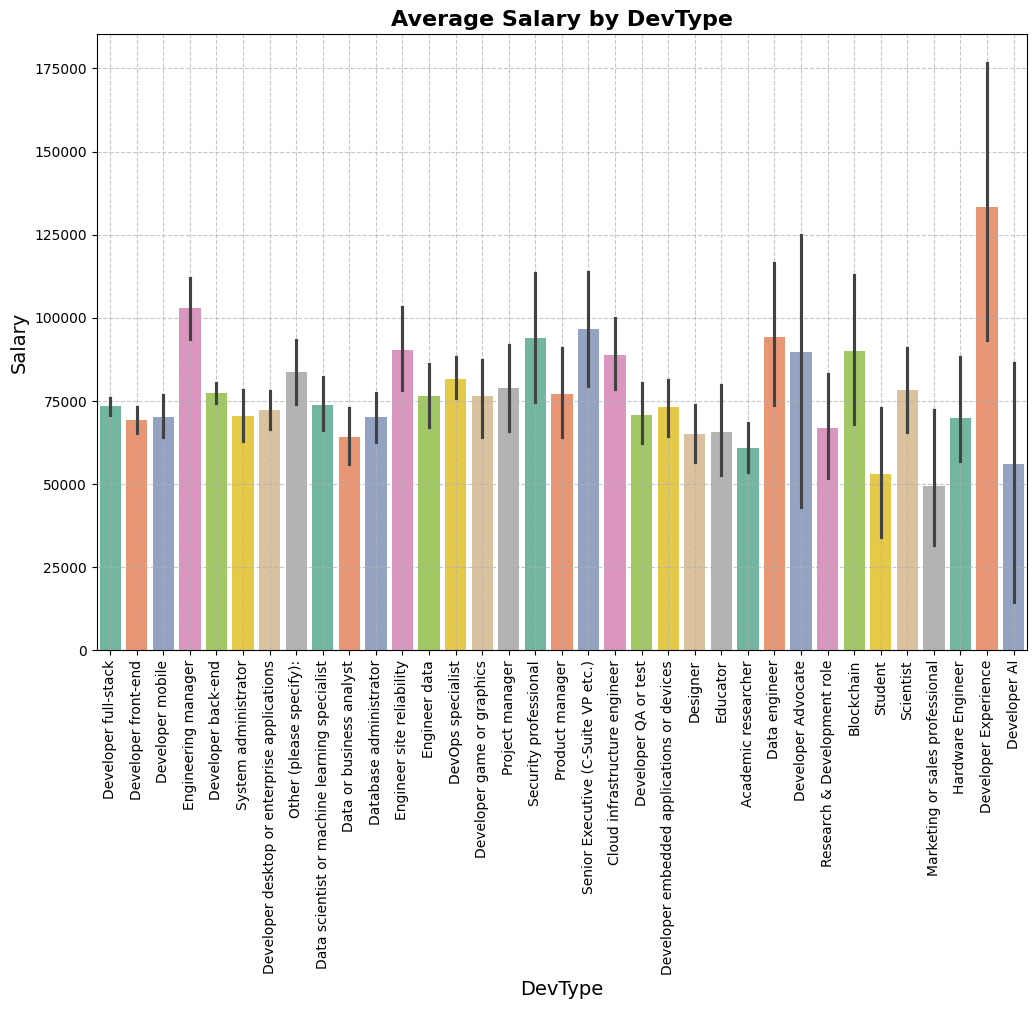

In [54]:
devtype_expanded = data.explode('DevType')
expanded_data = data.explode('DevType')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='DevType', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by DevType', fontsize=16, weight='bold')
plt.xlabel('DevType', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

In [55]:
data['DevType'].explode().unique()

array(['Developer full-stack', 'Developer front-end', 'Developer mobile',
       'Engineering manager', 'Developer back-end',
       'System administrator',
       'Developer desktop or enterprise applications',
       'Other (please specify):',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Database administrator',
       'Engineer site reliability', 'Engineer data', 'DevOps specialist',
       'Developer game or graphics', 'Project manager',
       'Security professional', 'Product manager',
       'Senior Executive (C-Suite VP etc.)',
       'Cloud infrastructure engineer', 'Developer QA or test',
       'Developer embedded applications or devices', 'Designer',
       'Educator', 'Academic researcher', 'Data engineer',
       'Developer Advocate', 'Research & Development role', 'Blockchain',
       'Student', 'Scientist', 'Marketing or sales professional',
       'Hardware Engineer', 'Developer Experience', 'Developer AI'],
      dtype=ob

C:\Users\Admin\AppData\Local\Temp\ipykernel_12336\2002881208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Employment_string', y='Salary', palette="Set2")


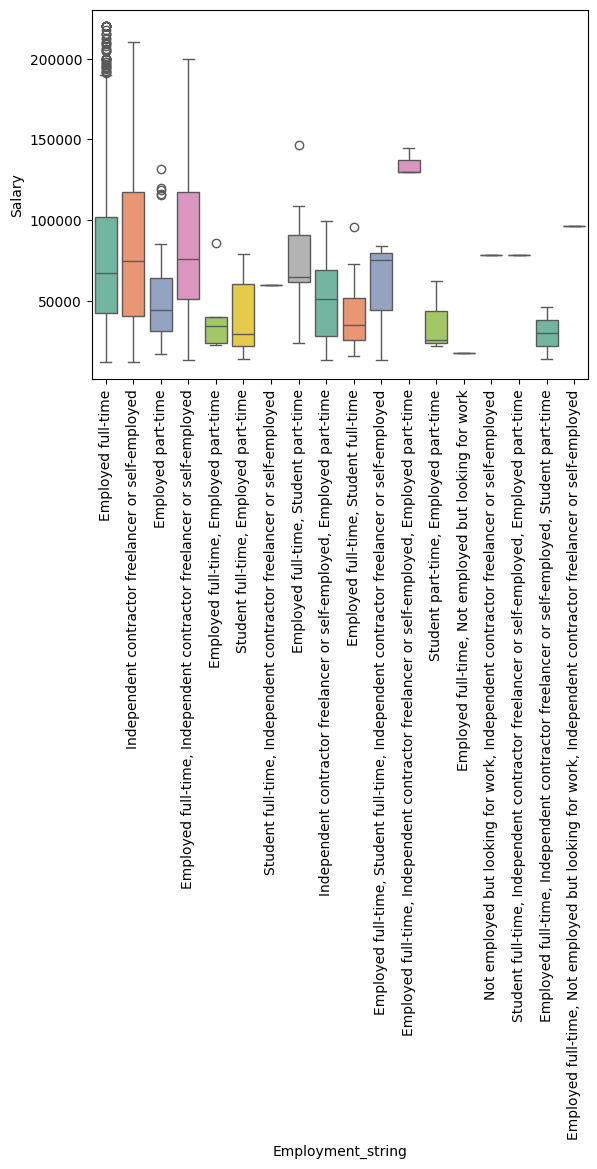

ANOVA result: F_onewayResult(statistic=3.118991252219246, pvalue=1.6304209598808143e-05)


In [56]:
from scipy.stats import f_oneway

data['Employment_string'] = data['Employment'].apply(lambda x: ', '.join(x))
sns.boxplot(data=data, x='Employment_string', y='Salary', palette="Set2")
plt.xticks(rotation=90) 
plt.show()

anova_result = f_oneway(*[data['Salary'][data['Employment_string'] == group] for group in data['Employment_string'].unique()])
print('ANOVA result:', anova_result)
data = data.drop('Employment_string',axis=1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12336\2829554354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")


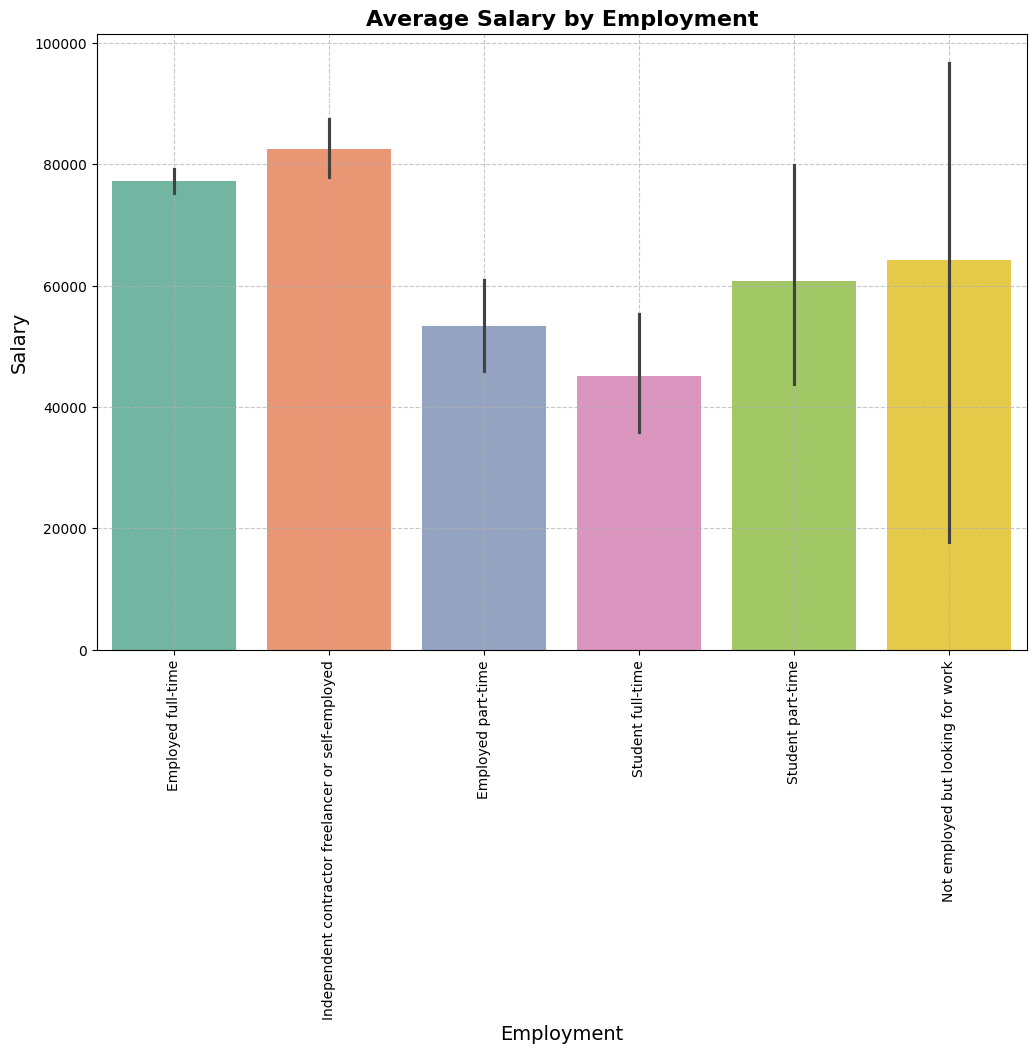

In [57]:

expanded_data = data.explode('Employment')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by Employment', fontsize=16, weight='bold')
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

Dữ liệu đang có vấn đề ....

In [58]:
data['Employment']

0                                    [Employed full-time]
1                                    [Employed full-time]
2                                    [Employed full-time]
3                                    [Employed full-time]
4       [Independent contractor freelancer or self-emp...
                              ...                        
2595                                 [Employed full-time]
2596                                 [Employed full-time]
2597                                 [Employed full-time]
2598                                 [Employed full-time]
2599                                 [Employed full-time]
Name: Employment, Length: 2600, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_12336\310834881.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")


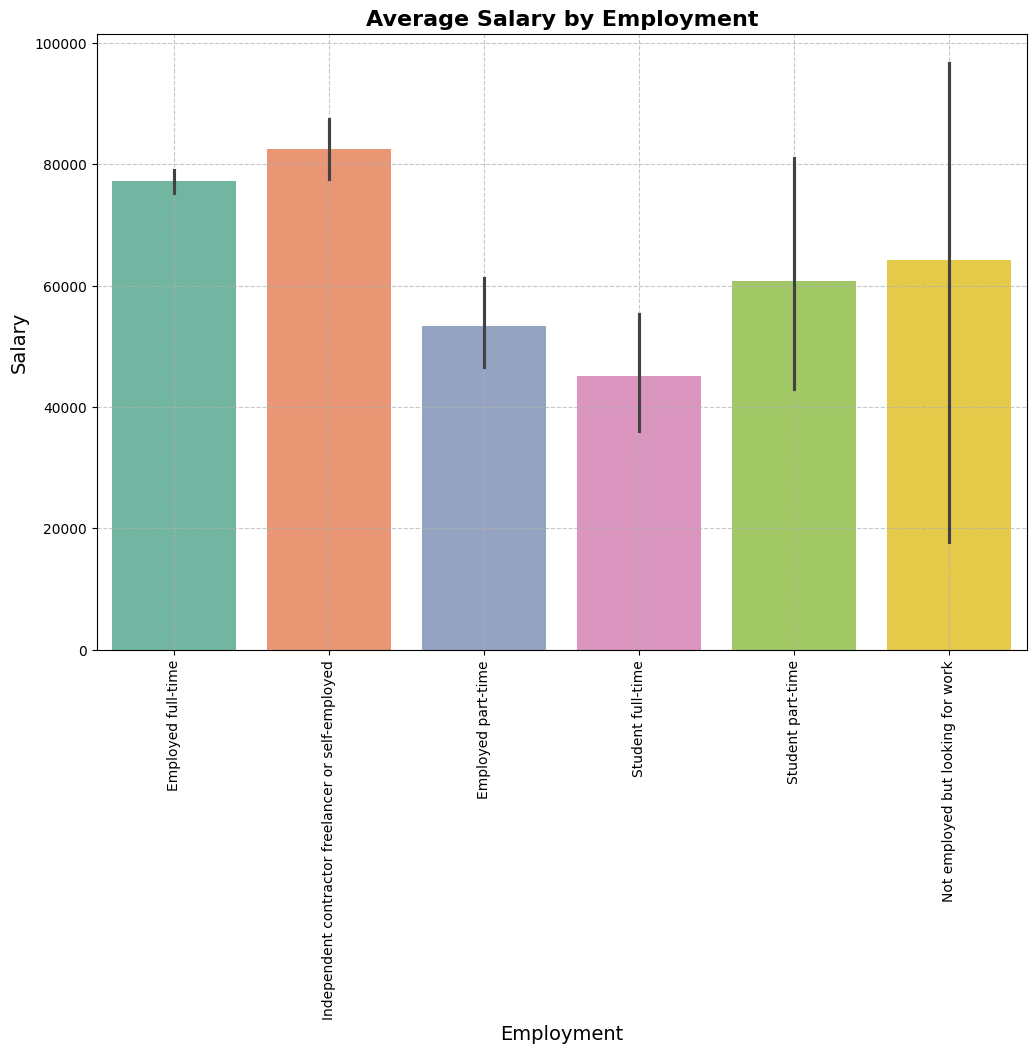

In [59]:
expanded_data = data.explode('Employment')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by Employment', fontsize=16, weight='bold')
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

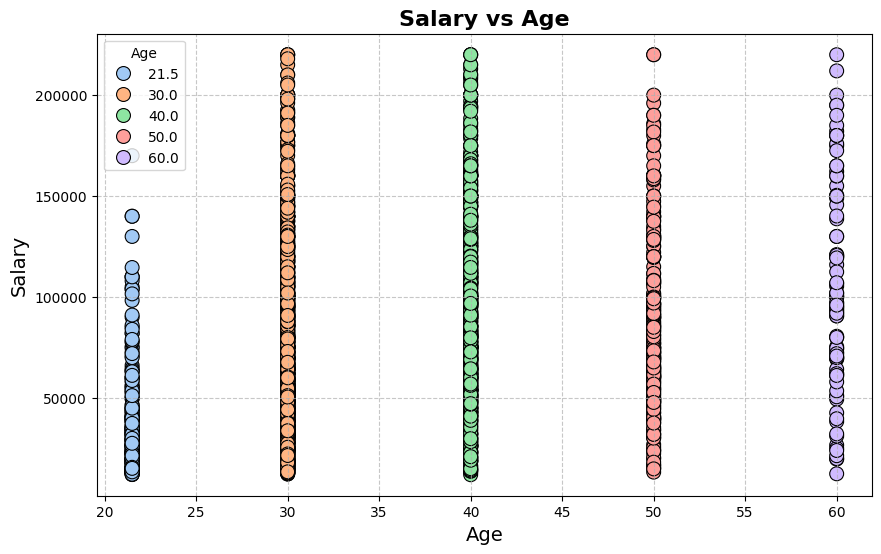

In [60]:
# Cải thiện trực quan của scatterplot
plt.figure(figsize=(10, 6))

# Sử dụng màu sắc nhẹ nhàng cho biểu đồ phân tán
sns.set_palette("pastel")

# Vẽ biểu đồ phân tán giữa Age và Salary
sns.scatterplot(data=data, x='Age', y='Salary', hue='Age', palette='pastel', s=100, edgecolor='black')

# Cải thiện tiêu đề và nhãn
plt.title('Salary vs Age', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Hiển thị lưới nhẹ
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12336\4198271212.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='Country', y='Salary', palette='pastel', s=100, edgecolor='black')


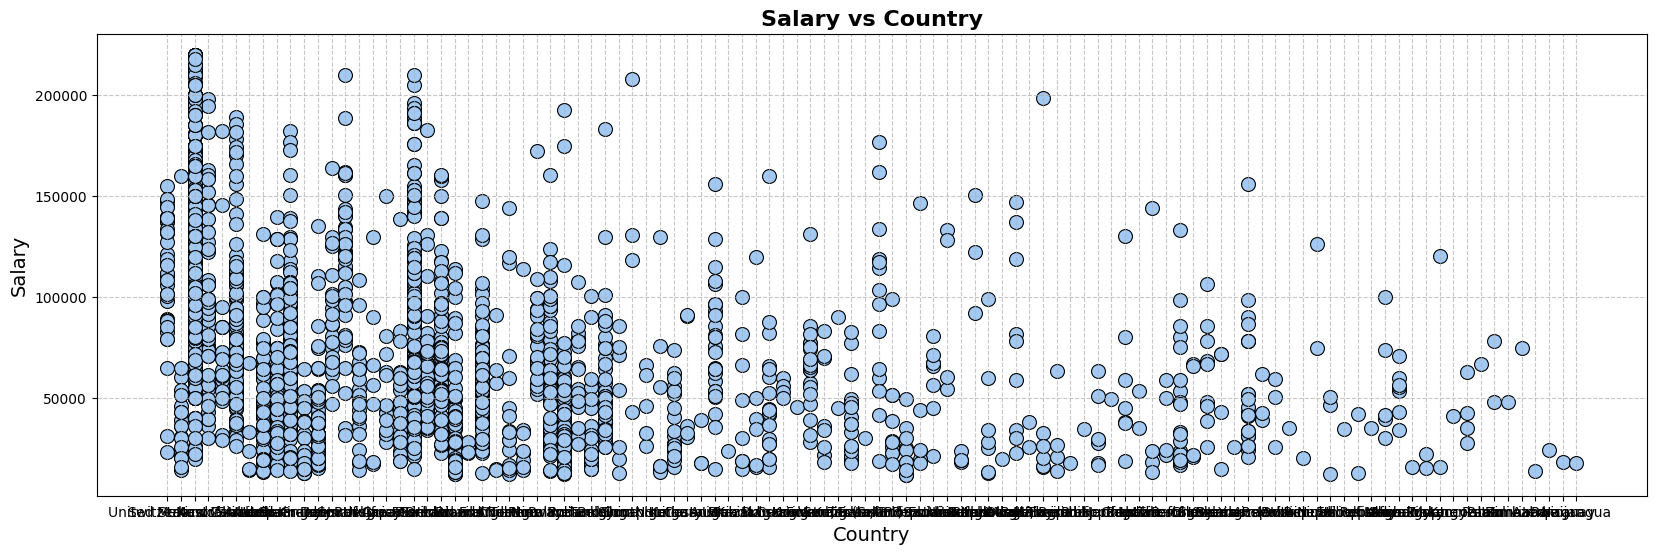

In [61]:
# Cải thiện trực quan của scatterplot
plt.figure(figsize=(20, 6))

# Sử dụng màu sắc nhẹ nhàng cho biểu đồ phân tán
sns.set_palette("pastel")

# Vẽ biểu đồ phân tán giữa Age và Salary
sns.scatterplot(data=data, x='Country', y='Salary', palette='pastel', s=100, edgecolor='black')

# Cải thiện tiêu đề và nhãn
plt.title('Salary vs Country', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Hiển thị lưới nhẹ
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

In [62]:
# Combine all relevant columns into a single 'skills' column
skills_columns = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",
]

# Remove 'NaN' and combine lists while deduplicating
def combine_skills(row):
    combined = []
    for col in skills_columns:
        if pd.notna(row[col]):  # Check if the column is not NaN
            combined.extend(eval(row[col]))  # Convert string representation of lists to actual lists
    return list(set(combined))  # Remove duplicates

data["skills"] = data.apply(combine_skills, axis=1)

data


,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,skills
0,121238.0,30.0,6.0,4.0,Switzerland,Associate degree,[Developer full-stack],[Employed full-time],"['JavaScript', 'Scala', 'TypeScript']","['Cloud Firestore', 'PostgreSQL']","['Firebase', 'Fly.io', 'Google Cloud']","['Next.js', 'React']","['Docker', 'Homebrew', 'npm']","[Scala, Docker, PostgreSQL, React, npm, TypeSc..."
1,45799.0,30.0,8.0,5.0,Mexico,Associate degree,[Developer front-end],[Employed full-time],"['HTML/CSS', 'JavaScript', 'PHP', 'SQL', 'Type...",['MySQL'],"['Google Cloud', 'Heroku', 'Microsoft Azure']","['Express', 'Next.js', 'Node.js', 'React', 'Re...","['npm', 'Webpack']","[Remix, HTML/CSS, Express, PHP, React, Webpack..."
2,80000.0,30.0,3.0,1.0,United States of America,Associate degree,[Developer full-stack],[Employed full-time],"['C#', 'HTML/CSS', 'JavaScript', 'Ruby', 'SQL'...","['Firebase', 'MongoDB', 'PostgreSQL']","['AWS', 'Heroku']","['ASP.NET Core ', 'Express', 'React.js', 'Ruby...",['Git'],"[Ruby, HTML/CSS, PostgreSQL, Express, React.js..."
3,90193.0,30.0,10.0,8.0,Australia,Associate degree,"[Developer mobile, Engineering manager]",[Employed full-time],"['Dart', 'Objective-C', 'Python', 'Swift']","['Firebase', 'SQLite']","['AWS', 'Google Cloud Platform']","['FastAPI', 'Flask']",[],"[Flask, Swift, FastAPI, Dart, Python, Firebase..."
4,182106.0,60.0,30.0,24.0,New Zealand,Associate degree,[Developer full-stack],[Independent contractor freelancer or self-emp...,"['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...","['BigQuery', 'Couch DB', 'InfluxDB', 'Microsof...","['Cloudflare', 'Google Cloud']","['Spring Boot', 'Vue.js']","['Ansible', 'Docker', 'Gradle', 'npm', 'Terraf...","[Docker, InfluxDB, Couch DB, HTML/CSS, Ansible..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,28368.0,21.5,3.0,2.0,"Iran, Islamic Republic of...",Some college,"[Developer full-stack, Developer back-end, Dev...",[Employed full-time],"['HTML/CSS', 'JavaScript', 'TypeScript']","['MongoDB', 'PostgreSQL']","['Managed Hosting', 'VMware']","['Express', 'Gatsby', 'Node.js', 'React.js']","['npm', 'Unity 3D', 'Yarn']","[Managed Hosting, HTML/CSS, PostgreSQL, Yarn, ..."
2596,72821.0,40.0,24.0,14.0,Germany,Some college,[Developer desktop or enterprise applications],[Employed full-time],"['JavaScript', 'SQL', 'Visual Basic (.Net)']","['Microsoft SQL Server', 'Oracle']",[],[],[],"[Microsoft SQL Server, SQL, JavaScript, Oracle..."
2597,30000.0,21.5,3.0,1.0,United States of America,Some college,"[Developer front-end, Developer full-stack, St...",[Employed full-time],"['C', 'C#', 'C++', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],[],"['ASP.NET', 'ASP.NET Core ', 'jQuery']",['Git'],"[Microsoft SQL Server, HTML/CSS, C, Git, SQL, ..."
2598,85000.0,50.0,28.0,26.0,United States of America,Some college,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"['C#', 'HTML/CSS', 'Java', 'JavaScript', 'Powe...","['Microsoft SQL Server', 'MySQL']",[],"['ASP.NET', 'jQuery']",[],"[Microsoft SQL Server, HTML/CSS, SQL, jQuery, ..."


In [63]:
# import pandas as pd

# # Giả sử df là DataFrame của bạn
# def categorize_dev_type(dev_types):
#     developer_roles = [
#         'Developer embedded applications or devices', 'Developer full-stack', 'Developer back-end', 
#         'Developer desktop or enterprise applications', 'Developer front-end', 'Developer mobile', 
#         'Developer QA or test', 'Developer game or graphics', 'Developer Experience', 'Developer AI'
#     ]
#     data_roles = ['Data or business analyst', 'Data scientist or machine learning specialist', 'Data engineer']
#     engineer_roles = ['Cloud infrastructure engineer', 'DevOps specialist', 'Engineer site reliability', 
#                       'Engineer data', 'Hardware Engineer', 'Security professional']
#     management_roles = ['Engineering manager', 'Project manager', 'Product manager', 'Senior Executive (C-Suite VP etc.)']
#     academic_roles = ['Academic researcher', 'Scientist', 'Educator', 'Research & Development role']
#     misc_roles = ['Designer', 'Marketing or sales professional', 'Blockchain', 'Developer Advocate', 
#                   'System administrator', 'Other (please specify):']
    
#     if any(role in dev_types for role in developer_roles):
#         return 'Developer Roles'
#     elif any(role in dev_types for role in data_roles):
#         return 'Data Roles'
#     elif any(role in dev_types for role in engineer_roles):
#         return 'Engineer Roles'
#     elif any(role in dev_types for role in management_roles):
#         return 'Management and Leadership Roles'
#     elif any(role in dev_types for role in academic_roles):
#         return 'Academic and Research Roles'
#     elif any(role in dev_types for role in misc_roles):
#         return 'Miscellaneous Roles'
#     else:
#         return 'Other'

# data['DevGroup'] = data['DevType'].apply(lambda x: categorize_dev_type(x))

# data['DevGroup']

------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [64]:
education_keywords = {
    "Bachelor": ["Bachelor", "Undergraduate", "BSc", "BA", "BEng"],
    "Master": ["Master", "MSc", "MA", "MEng", "MBA"],
    "PhD": ["PhD", "Doctoral", "Doctorate"],
    "Associate": ["Associate", "AAS", "AS"],
    "High School": ["High school", "Secondary school", "Highschool", "HS"],
    "Other": []
}

def classify_education_level(ed_level):
    if pd.isnull(ed_level):
        return "Other"
    
    levels_found = []
    for level, keywords in education_keywords.items():
        if any(keyword.lower() in str(ed_level).lower() for keyword in keywords):
            levels_found.append(level)
    
    if "Master" in levels_found:
        return "Master"
    elif "PhD" in levels_found:
        return "PhD"
    elif "Bachelor" in levels_found:
        return "Bachelor"
    elif "Associate" in levels_found:
        return "Associate"
    elif "High School" in levels_found:
        return "High School"
    else:
        return "Other"

data['EdLevelGroup'] = data['EdLevel'].apply(classify_education_level)

data


,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,skills,EdLevelGroup
0,121238.0,30.0,6.0,4.0,Switzerland,Associate degree,[Developer full-stack],[Employed full-time],"['JavaScript', 'Scala', 'TypeScript']","['Cloud Firestore', 'PostgreSQL']","['Firebase', 'Fly.io', 'Google Cloud']","['Next.js', 'React']","['Docker', 'Homebrew', 'npm']","[Scala, Docker, PostgreSQL, React, npm, TypeSc...",Associate
1,45799.0,30.0,8.0,5.0,Mexico,Associate degree,[Developer front-end],[Employed full-time],"['HTML/CSS', 'JavaScript', 'PHP', 'SQL', 'Type...",['MySQL'],"['Google Cloud', 'Heroku', 'Microsoft Azure']","['Express', 'Next.js', 'Node.js', 'React', 'Re...","['npm', 'Webpack']","[Remix, HTML/CSS, Express, PHP, React, Webpack...",Associate
2,80000.0,30.0,3.0,1.0,United States of America,Associate degree,[Developer full-stack],[Employed full-time],"['C#', 'HTML/CSS', 'JavaScript', 'Ruby', 'SQL'...","['Firebase', 'MongoDB', 'PostgreSQL']","['AWS', 'Heroku']","['ASP.NET Core ', 'Express', 'React.js', 'Ruby...",['Git'],"[Ruby, HTML/CSS, PostgreSQL, Express, React.js...",Associate
3,90193.0,30.0,10.0,8.0,Australia,Associate degree,"[Developer mobile, Engineering manager]",[Employed full-time],"['Dart', 'Objective-C', 'Python', 'Swift']","['Firebase', 'SQLite']","['AWS', 'Google Cloud Platform']","['FastAPI', 'Flask']",[],"[Flask, Swift, FastAPI, Dart, Python, Firebase...",Associate
4,182106.0,60.0,30.0,24.0,New Zealand,Associate degree,[Developer full-stack],[Independent contractor freelancer or self-emp...,"['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...","['BigQuery', 'Couch DB', 'InfluxDB', 'Microsof...","['Cloudflare', 'Google Cloud']","['Spring Boot', 'Vue.js']","['Ansible', 'Docker', 'Gradle', 'npm', 'Terraf...","[Docker, InfluxDB, Couch DB, HTML/CSS, Ansible...",Associate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,28368.0,21.5,3.0,2.0,"Iran, Islamic Republic of...",Some college,"[Developer full-stack, Developer back-end, Dev...",[Employed full-time],"['HTML/CSS', 'JavaScript', 'TypeScript']","['MongoDB', 'PostgreSQL']","['Managed Hosting', 'VMware']","['Express', 'Gatsby', 'Node.js', 'React.js']","['npm', 'Unity 3D', 'Yarn']","[Managed Hosting, HTML/CSS, PostgreSQL, Yarn, ...",Other
2596,72821.0,40.0,24.0,14.0,Germany,Some college,[Developer desktop or enterprise applications],[Employed full-time],"['JavaScript', 'SQL', 'Visual Basic (.Net)']","['Microsoft SQL Server', 'Oracle']",[],[],[],"[Microsoft SQL Server, SQL, JavaScript, Oracle...",Other
2597,30000.0,21.5,3.0,1.0,United States of America,Some college,"[Developer front-end, Developer full-stack, St...",[Employed full-time],"['C', 'C#', 'C++', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],[],"['ASP.NET', 'ASP.NET Core ', 'jQuery']",['Git'],"[Microsoft SQL Server, HTML/CSS, C, Git, SQL, ...",Other
2598,85000.0,50.0,28.0,26.0,United States of America,Some college,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"['C#', 'HTML/CSS', 'Java', 'JavaScript', 'Powe...","['Microsoft SQL Server', 'MySQL']",[],"['ASP.NET', 'jQuery']",[],"[Microsoft SQL Server, HTML/CSS, SQL, jQuery, ...",Other


In [65]:
education_mapping = {
    'Other': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

data['EdLevelGroup'] = data['EdLevelGroup'].map(education_mapping)

In [66]:
data = data.reset_index(drop=True)

In [67]:

# education_mapping = {
#     'Other':1,
#     'Some college':2,
#     'Secondary school':3,
#     'Professional degree':4,
#     'Master’s degree':5,
#     'Associate degree':6,
#     'Bachelor’s degree':7,
#     'Doctoral degree':8
# }

# data['EdLevel'] = data['EdLevel'].map(education_mapping)

In [68]:
data = data.reset_index(drop=True)

In [69]:
data

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,skills,EdLevelGroup
0,121238.0,30.0,6.0,4.0,Switzerland,Associate degree,[Developer full-stack],[Employed full-time],"['JavaScript', 'Scala', 'TypeScript']","['Cloud Firestore', 'PostgreSQL']","['Firebase', 'Fly.io', 'Google Cloud']","['Next.js', 'React']","['Docker', 'Homebrew', 'npm']","[Scala, Docker, PostgreSQL, React, npm, TypeSc...",1.0
1,45799.0,30.0,8.0,5.0,Mexico,Associate degree,[Developer front-end],[Employed full-time],"['HTML/CSS', 'JavaScript', 'PHP', 'SQL', 'Type...",['MySQL'],"['Google Cloud', 'Heroku', 'Microsoft Azure']","['Express', 'Next.js', 'Node.js', 'React', 'Re...","['npm', 'Webpack']","[Remix, HTML/CSS, Express, PHP, React, Webpack...",1.0
2,80000.0,30.0,3.0,1.0,United States of America,Associate degree,[Developer full-stack],[Employed full-time],"['C#', 'HTML/CSS', 'JavaScript', 'Ruby', 'SQL'...","['Firebase', 'MongoDB', 'PostgreSQL']","['AWS', 'Heroku']","['ASP.NET Core ', 'Express', 'React.js', 'Ruby...",['Git'],"[Ruby, HTML/CSS, PostgreSQL, Express, React.js...",1.0
3,90193.0,30.0,10.0,8.0,Australia,Associate degree,"[Developer mobile, Engineering manager]",[Employed full-time],"['Dart', 'Objective-C', 'Python', 'Swift']","['Firebase', 'SQLite']","['AWS', 'Google Cloud Platform']","['FastAPI', 'Flask']",[],"[Flask, Swift, FastAPI, Dart, Python, Firebase...",1.0
4,182106.0,60.0,30.0,24.0,New Zealand,Associate degree,[Developer full-stack],[Independent contractor freelancer or self-emp...,"['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...","['BigQuery', 'Couch DB', 'InfluxDB', 'Microsof...","['Cloudflare', 'Google Cloud']","['Spring Boot', 'Vue.js']","['Ansible', 'Docker', 'Gradle', 'npm', 'Terraf...","[Docker, InfluxDB, Couch DB, HTML/CSS, Ansible...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,28368.0,21.5,3.0,2.0,"Iran, Islamic Republic of...",Some college,"[Developer full-stack, Developer back-end, Dev...",[Employed full-time],"['HTML/CSS', 'JavaScript', 'TypeScript']","['MongoDB', 'PostgreSQL']","['Managed Hosting', 'VMware']","['Express', 'Gatsby', 'Node.js', 'React.js']","['npm', 'Unity 3D', 'Yarn']","[Managed Hosting, HTML/CSS, PostgreSQL, Yarn, ...",0.0
2596,72821.0,40.0,24.0,14.0,Germany,Some college,[Developer desktop or enterprise applications],[Employed full-time],"['JavaScript', 'SQL', 'Visual Basic (.Net)']","['Microsoft SQL Server', 'Oracle']",[],[],[],"[Microsoft SQL Server, SQL, JavaScript, Oracle...",0.0
2597,30000.0,21.5,3.0,1.0,United States of America,Some college,"[Developer front-end, Developer full-stack, St...",[Employed full-time],"['C', 'C#', 'C++', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],[],"['ASP.NET', 'ASP.NET Core ', 'jQuery']",['Git'],"[Microsoft SQL Server, HTML/CSS, C, Git, SQL, ...",0.0
2598,85000.0,50.0,28.0,26.0,United States of America,Some college,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"['C#', 'HTML/CSS', 'Java', 'JavaScript', 'Powe...","['Microsoft SQL Server', 'MySQL']",[],"['ASP.NET', 'jQuery']",[],"[Microsoft SQL Server, HTML/CSS, SQL, jQuery, ...",0.0


In [70]:
# data = data.drop('DevType',axis=1)

MÔ HÌNH TUYẾN TÍNH: Logistic Regression, Linear Regression, SVM với kernel tuyến tính

In [71]:
data = data.drop(columns = ['LanguageHaveWorkedWith',"DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",])

Mã hóa

In [72]:
df1 = data

Mã hóa cho DevType

In [73]:
all_dev_types = set([dev for sublist in df1['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df1[dev_type] = df1['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [74]:
df1 

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,EdLevelGroup,...,Data scientist or machine learning specialist,Academic researcher,Data or business analyst,Engineering manager,Developer desktop or enterprise applications,Data engineer,Senior Executive (C-Suite VP etc.),Developer Advocate,Developer back-end,Hardware Engineer
0,121238.0,30.0,6.0,4.0,Switzerland,Associate degree,[Developer full-stack],[Employed full-time],"[Scala, Docker, PostgreSQL, React, npm, TypeSc...",1.0,...,0,0,0,0,0,0,0,0,0,0
1,45799.0,30.0,8.0,5.0,Mexico,Associate degree,[Developer front-end],[Employed full-time],"[Remix, HTML/CSS, Express, PHP, React, Webpack...",1.0,...,0,0,0,0,0,0,0,0,0,0
2,80000.0,30.0,3.0,1.0,United States of America,Associate degree,[Developer full-stack],[Employed full-time],"[Ruby, HTML/CSS, PostgreSQL, Express, React.js...",1.0,...,0,0,0,0,0,0,0,0,0,0
3,90193.0,30.0,10.0,8.0,Australia,Associate degree,"[Developer mobile, Engineering manager]",[Employed full-time],"[Flask, Swift, FastAPI, Dart, Python, Firebase...",1.0,...,0,0,0,1,0,0,0,0,0,0
4,182106.0,60.0,30.0,24.0,New Zealand,Associate degree,[Developer full-stack],[Independent contractor freelancer or self-emp...,"[Docker, InfluxDB, Couch DB, HTML/CSS, Ansible...",1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,28368.0,21.5,3.0,2.0,"Iran, Islamic Republic of...",Some college,"[Developer full-stack, Developer back-end, Dev...",[Employed full-time],"[Managed Hosting, HTML/CSS, PostgreSQL, Yarn, ...",0.0,...,0,0,0,0,0,0,0,0,1,0
2596,72821.0,40.0,24.0,14.0,Germany,Some college,[Developer desktop or enterprise applications],[Employed full-time],"[Microsoft SQL Server, SQL, JavaScript, Oracle...",0.0,...,0,0,0,0,1,0,0,0,0,0
2597,30000.0,21.5,3.0,1.0,United States of America,Some college,"[Developer front-end, Developer full-stack, St...",[Employed full-time],"[Microsoft SQL Server, HTML/CSS, C, Git, SQL, ...",0.0,...,0,0,0,0,0,0,0,0,0,0
2598,85000.0,50.0,28.0,26.0,United States of America,Some college,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[Microsoft SQL Server, HTML/CSS, SQL, jQuery, ...",0.0,...,0,0,1,0,0,0,0,0,1,0


In [75]:
df1 = df1.reset_index(drop=True)

Mã hóa EdLevelGroup

In [76]:
df1 = df1.reset_index(drop=True)

In [77]:
from sklearn.preprocessing import OneHotEncoder

In [78]:
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# encoded = encoder.fit_transform(df1[['EdLevel']])
# encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['EdLevel']))

# df1 = pd.concat([df1, encoded_df], axis=1)

# df1

In [79]:
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# encoded = encoder.fit_transform(df1[['DevGroup']])
# encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['
# 
# ']))

# df1 = pd.concat([df1, encoded_df], axis=1)

# df1

In [80]:
df1 = df1.dropna()

In [81]:
df1  = df1.reset_index(drop=True)

Mã hóa cho Age (dữ liệu trung bình nhóm tuổi vd 18-24 21)

In [82]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['Age']])
encoded_df = pd.DataFrame(encoded, columns=[f'Age_{col}' for col in encoder.categories_[0]])
df1 = pd.concat([df1, encoded_df], axis=1)

df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,EdLevelGroup,...,Data engineer,Senior Executive (C-Suite VP etc.),Developer Advocate,Developer back-end,Hardware Engineer,Age_21.5,Age_30.0,Age_40.0,Age_50.0,Age_60.0
0,121238.0,30.0,6.0,4.0,Switzerland,Associate degree,[Developer full-stack],[Employed full-time],"[Scala, Docker, PostgreSQL, React, npm, TypeSc...",1.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
1,45799.0,30.0,8.0,5.0,Mexico,Associate degree,[Developer front-end],[Employed full-time],"[Remix, HTML/CSS, Express, PHP, React, Webpack...",1.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
2,80000.0,30.0,3.0,1.0,United States of America,Associate degree,[Developer full-stack],[Employed full-time],"[Ruby, HTML/CSS, PostgreSQL, Express, React.js...",1.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
3,90193.0,30.0,10.0,8.0,Australia,Associate degree,"[Developer mobile, Engineering manager]",[Employed full-time],"[Flask, Swift, FastAPI, Dart, Python, Firebase...",1.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
4,182106.0,60.0,30.0,24.0,New Zealand,Associate degree,[Developer full-stack],[Independent contractor freelancer or self-emp...,"[Docker, InfluxDB, Couch DB, HTML/CSS, Ansible...",1.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,28368.0,21.5,3.0,2.0,"Iran, Islamic Republic of...",Some college,"[Developer full-stack, Developer back-end, Dev...",[Employed full-time],"[Managed Hosting, HTML/CSS, PostgreSQL, Yarn, ...",0.0,...,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0
2486,72821.0,40.0,24.0,14.0,Germany,Some college,[Developer desktop or enterprise applications],[Employed full-time],"[Microsoft SQL Server, SQL, JavaScript, Oracle...",0.0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2487,30000.0,21.5,3.0,1.0,United States of America,Some college,"[Developer front-end, Developer full-stack, St...",[Employed full-time],"[Microsoft SQL Server, HTML/CSS, C, Git, SQL, ...",0.0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2488,85000.0,50.0,28.0,26.0,United States of America,Some college,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[Microsoft SQL Server, HTML/CSS, SQL, jQuery, ...",0.0,...,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0


In [83]:
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# encoded = encoder.fit_transform(df1[['DevGroup']])
# encoded_df = pd.DataFrame(encoded, columns=[f'DevGroup_{col}' for col in encoder.categories_[0]])
# df1 = pd.concat([df1, encoded_df], axis=1)

# df1

In [84]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['Country']])
encoded_df = pd.DataFrame(encoded, columns=[f'Country_{col}' for col in encoder.categories_[0]])
df1 = pd.concat([df1, encoded_df], axis=1)

df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,EdLevelGroup,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Zimbabwe
0,121238.0,30.0,6.0,4.0,Switzerland,Associate degree,[Developer full-stack],[Employed full-time],"[Scala, Docker, PostgreSQL, React, npm, TypeSc...",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45799.0,30.0,8.0,5.0,Mexico,Associate degree,[Developer front-end],[Employed full-time],"[Remix, HTML/CSS, Express, PHP, React, Webpack...",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80000.0,30.0,3.0,1.0,United States of America,Associate degree,[Developer full-stack],[Employed full-time],"[Ruby, HTML/CSS, PostgreSQL, Express, React.js...",1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,90193.0,30.0,10.0,8.0,Australia,Associate degree,"[Developer mobile, Engineering manager]",[Employed full-time],"[Flask, Swift, FastAPI, Dart, Python, Firebase...",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,182106.0,60.0,30.0,24.0,New Zealand,Associate degree,[Developer full-stack],[Independent contractor freelancer or self-emp...,"[Docker, InfluxDB, Couch DB, HTML/CSS, Ansible...",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,28368.0,21.5,3.0,2.0,"Iran, Islamic Republic of...",Some college,"[Developer full-stack, Developer back-end, Dev...",[Employed full-time],"[Managed Hosting, HTML/CSS, PostgreSQL, Yarn, ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2486,72821.0,40.0,24.0,14.0,Germany,Some college,[Developer desktop or enterprise applications],[Employed full-time],"[Microsoft SQL Server, SQL, JavaScript, Oracle...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2487,30000.0,21.5,3.0,1.0,United States of America,Some college,"[Developer front-end, Developer full-stack, St...",[Employed full-time],"[Microsoft SQL Server, HTML/CSS, C, Git, SQL, ...",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2488,85000.0,50.0,28.0,26.0,United States of America,Some college,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[Microsoft SQL Server, HTML/CSS, SQL, jQuery, ...",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df1['Employment'] = df1['Employment'].apply(lambda x: str(x))  # Chuyển list thành string

# Lấy danh sách tất cả các cụm employment (gồm cả list gốc)
all_employment_types = set(df1['Employment'])
for employment_type in all_employment_types:
    df1[employment_type] = df1['Employment'].apply(lambda x: 1 if x == employment_type else 0)

In [86]:
df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,EdLevelGroup,...,['Independent contractor freelancer or self-employed'],"['Employed full-time', 'Student full-time']","['Employed full-time', 'Employed part-time']","['Employed full-time', 'Not employed but looking for work']","['Student part-time', 'Employed part-time']","['Employed full-time', 'Not employed but looking for work', 'Independent contractor freelancer or self-employed']","['Employed full-time', 'Independent contractor freelancer or self-employed']","['Employed full-time', 'Student part-time']","['Employed full-time', 'Independent contractor freelancer or self-employed', 'Employed part-time']",['Employed part-time']
0,121238.0,30.0,6.0,4.0,Switzerland,Associate degree,[Developer full-stack],['Employed full-time'],"[Scala, Docker, PostgreSQL, React, npm, TypeSc...",1.0,...,0,0,0,0,0,0,0,0,0,0
1,45799.0,30.0,8.0,5.0,Mexico,Associate degree,[Developer front-end],['Employed full-time'],"[Remix, HTML/CSS, Express, PHP, React, Webpack...",1.0,...,0,0,0,0,0,0,0,0,0,0
2,80000.0,30.0,3.0,1.0,United States of America,Associate degree,[Developer full-stack],['Employed full-time'],"[Ruby, HTML/CSS, PostgreSQL, Express, React.js...",1.0,...,0,0,0,0,0,0,0,0,0,0
3,90193.0,30.0,10.0,8.0,Australia,Associate degree,"[Developer mobile, Engineering manager]",['Employed full-time'],"[Flask, Swift, FastAPI, Dart, Python, Firebase...",1.0,...,0,0,0,0,0,0,0,0,0,0
4,182106.0,60.0,30.0,24.0,New Zealand,Associate degree,[Developer full-stack],['Independent contractor freelancer or self-em...,"[Docker, InfluxDB, Couch DB, HTML/CSS, Ansible...",1.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,28368.0,21.5,3.0,2.0,"Iran, Islamic Republic of...",Some college,"[Developer full-stack, Developer back-end, Dev...",['Employed full-time'],"[Managed Hosting, HTML/CSS, PostgreSQL, Yarn, ...",0.0,...,0,0,0,0,0,0,0,0,0,0
2486,72821.0,40.0,24.0,14.0,Germany,Some college,[Developer desktop or enterprise applications],['Employed full-time'],"[Microsoft SQL Server, SQL, JavaScript, Oracle...",0.0,...,0,0,0,0,0,0,0,0,0,0
2487,30000.0,21.5,3.0,1.0,United States of America,Some college,"[Developer front-end, Developer full-stack, St...",['Employed full-time'],"[Microsoft SQL Server, HTML/CSS, C, Git, SQL, ...",0.0,...,0,0,0,0,0,0,0,0,0,0
2488,85000.0,50.0,28.0,26.0,United States of America,Some college,"[Developer front-end, Developer full-stack, De...",['Employed full-time'],"[Microsoft SQL Server, HTML/CSS, SQL, jQuery, ...",0.0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer
df1['skills'] = df1['skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

mlb = MultiLabelBinarizer()
skills_encoded_train = mlb.fit_transform(df1['skills'])
skills_df_train = pd.DataFrame(skills_encoded_train, columns=mlb.classes_)
df1 = pd.concat([df1.drop(columns=['skills']), skills_df_train], axis=1)

In [88]:
df1 = df1.drop(columns = ['Country','Age','Employment'])

In [89]:
df1 = df1.drop(columns = ['DevType'])

In [90]:

df1['Ratio'] = np.where(df1['YearsCode'] != 0, df1['YearsCodePro'] /df1['YearsCode'], 0)

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df1.drop(columns=['EdLevel'])  
y = df1['EdLevel'] 

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, temp_idx in splitter.split(X, y):
    train_data = df1.iloc[train_idx]
    temp_data = df1.iloc[temp_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in splitter.split(temp_data.drop(columns=['EdLevel']), temp_data['EdLevel']):
    val_data = temp_data.iloc[val_idx]
    test_data = temp_data.iloc[test_idx]

print(f"Kích thước train: {len(train_data)}")
print(f"Kích thước val: {len(val_data)}")
print(f"Kích thước test: {len(test_data)}")


Kích thước train: 1992
Kích thước val: 249
Kích thước test: 249


Thêm đặc trưng

In [92]:
# import numpy as np

# df1['Ratio'] = np.where(df1['YearsCode'] != 0, train_data['YearsCodePro'] / train_data['YearsCode'], 0)
# val_data['Ratio'] = np.where(val_data['YearsCode'] != 0, val_data['YearsCodePro'] / val_data['YearsCode'], 0)
# test_data['Ratio'] = np.where(test_data['YearsCode'] != 0, test_data['YearsCodePro'] / test_data['YearsCode'], 0)


In [93]:
val_data

,Salary,YearsCode,YearsCodePro,EdLevel,EdLevelGroup,Other (please specify):,DevOps specialist,Student,Developer AI,Developer full-stack,...,Yarn,Yii 2,Zig,bandit,cppunit,doctest,jQuery,npm,pnpm,Ratio
63,112000.0,21.0,13.0,Associate degree,1.0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0.619048
1960,30300.0,31.0,22.0,Master’s degree,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.709677
867,118999.0,15.0,8.0,Bachelor’s degree,2.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.533333
798,170000.0,13.0,13.0,Bachelor’s degree,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.000000
287,26772.0,8.0,2.0,Bachelor’s degree,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,125000.0,25.0,9.0,Bachelor’s degree,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.360000
1653,69183.0,14.0,9.0,Master’s degree,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.642857
1901,101312.0,10.0,6.0,Master’s degree,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0.600000
1951,61571.0,3.0,2.0,Master’s degree,3.0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0.666667


In [94]:
train_data = train_data.drop(columns= ['YearsCode','YearsCodePro'])

In [95]:
val_data = val_data.drop(columns= ['YearsCode','YearsCodePro'])
test_data = test_data.drop(columns= ['YearsCode','YearsCodePro'])

In [96]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['Ratio']] = scaler.fit_transform(train_data[['Ratio']])
val_data[['Ratio']] = scaler.transform(val_data[['Ratio']])
test_data[['Ratio']] = scaler.transform(test_data[['Ratio']])
# train_data[['YearsCodePro']] = scaler.fit_transform(train_data[['YearsCodePro']])
# val_data[['YearsCodePro']] = scaler.transform(val_data[['YearsCodePro']])
# test_data[['YearsCodePro']] = scaler.transform(test_data[['YearsCodePro']])

# train_data[['YearsCode']] = scaler.fit_transform(train_data[['YearsCode']])
# val_data[['YearsCode']] = scaler.transform(val_data[['YearsCode']])
# test_data[['YearsCode']] = scaler.transform(test_data[['YearsCode']])


In [98]:
train_data = train_data.drop('EdLevel',axis=1)
val_data = val_data.drop('EdLevel',axis=1)
test_data = test_data.drop('EdLevel',axis=1)

In [99]:
X_train = train_data.drop('Salary',axis=1)
X_val = val_data.drop('Salary',axis=1)
X_test = test_data.drop('Salary',axis=1)

In [100]:
X_val

,EdLevelGroup,Other (please specify):,DevOps specialist,Student,Developer AI,Developer full-stack,Developer QA or test,Security professional,System administrator,Educator,...,Yarn,Yii 2,Zig,bandit,cppunit,doctest,jQuery,npm,pnpm,Ratio
0,1.0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,-0.101655
1,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.314795
2,2.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,-0.495518
3,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.648846
4,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.797453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.291996
245,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.007751
246,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.189180
247,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.117158


In [101]:
y_train = train_data['Salary']
y_val = val_data['Salary']
y_test = test_data['Salary']

# PCA

In [102]:
# X_train = X_train.drop('DevType',axis=1)
# X_val = X_val.drop('DevType',axis=1)
# X_test = X_test.drop('DevType',axis=1)

In [103]:
X_train = X_train.dropna()
X_val = X_val.dropna()


In [104]:
X_train

,EdLevelGroup,Other (please specify):,DevOps specialist,Student,Developer AI,Developer full-stack,Developer QA or test,Security professional,System administrator,Educator,...,Yarn,Yii 2,Zig,bandit,cppunit,doctest,jQuery,npm,pnpm,Ratio
0,2.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.362228
1,3.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.074463
2,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.648687
3,2.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0.500080
4,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1.138284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.907707
1988,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.022247
1989,3.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.265924
1990,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.471953


In [105]:
X_val

,EdLevelGroup,Other (please specify):,DevOps specialist,Student,Developer AI,Developer full-stack,Developer QA or test,Security professional,System administrator,Educator,...,Yarn,Yii 2,Zig,bandit,cppunit,doctest,jQuery,npm,pnpm,Ratio
0,1.0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,-0.101655
1,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.314795
2,2.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,-0.495518
3,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.648846
4,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.797453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.291996
245,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.007751
246,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-0.189180
247,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.117158


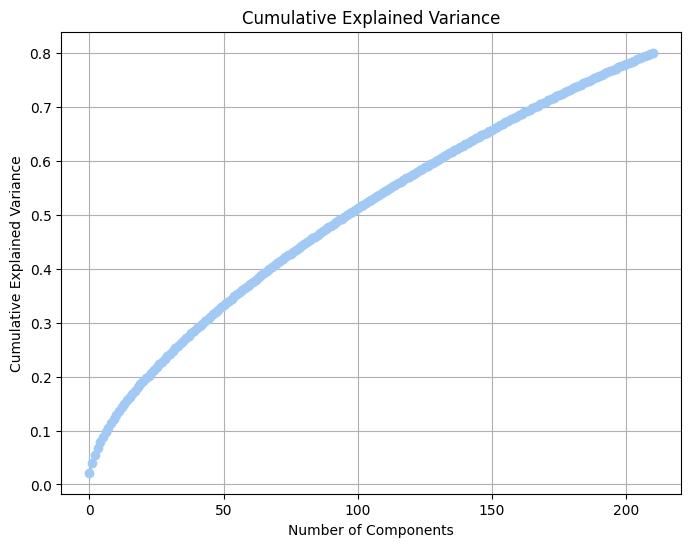

In [106]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Giả sử X_train đã được chuẩn bị
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)  # Sử dụng cùng scaler đã fit trên X_train


# Áp dụng PCA
pca = PCA(n_components=0.8)  # Giảm xuống 2 chiều để dễ vẽ
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)  # Dùng PCA đã fit trên X_train để giảm chiều X_val

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [107]:
import pandas as pd
import numpy as np

correlations = X_train.corrwith(y_train)
correlations = correlations.abs().sort_values(ascending=False)
num_features = int(0.8 * len(correlations)) 
selected_features = correlations.head(num_features).index  
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

print(f"Selected features: {selected_features}")


Selected features: Index(['Country_United States of America', 'Ratio', 'Age_40.0', 'Age_30.0',
       'Age_21.5', 'Country_India', 'Terraform', 'Country_Brazil', 'Homebrew',
       'PHP',
       ...
       'Supabase', 'Research & Development role', 'Couchbase',
       'PythonAnywhere', 'Oracle',
       'Data scientist or machine learning specialist', 'npm', 'Solr',
       'IBM DB2', 'Google Cloud Platform'],
      dtype='object', length=304)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# Mô hình

In [108]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Linear Regresion

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_val)



In [110]:
# Tính toán dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = lin_reg.predict(X_train)  # Dự đoán trên tập huấn luyện
y_val_pred = lin_reg.predict(X_val)     # Dự đoán trên tập kiểm tra

# Tính lỗi trên tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Tính lỗi trên tập kiểm tra (E_new)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

# In kết quả
print("Training set performance (E_train):")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R^2: {r2_train}")

print("\nValidation set performance (E_new):")
print(f"MAE: {mae_val}")
print(f"RMSE: {rmse_val}")
print(f"R^2: {r2_val}")


Training set performance (E_train):
MAE: 19206.24497991968
RMSE: 25672.883108689795
R^2: 0.6969411680437292

Validation set performance (E_new):
MAE: 3918149550154520.0
RMSE: 3.392078968191908e+16
R^2: -6.204568079680366e+23


Đang bị overfitting

In [111]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

y_pred = lin_reg.predict(X_val_selected)
# Tính toán dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = lin_reg.predict(X_train_selected)  # Dự đoán trên tập huấn luyện
y_val_pred = lin_reg.predict(X_val_selected)     # Dự đoán trên tập kiểm tra

# Tính lỗi trên tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Tính lỗi trên tập kiểm tra (E_new)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

# In kết quả
print("Training set performance (E_train):")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R^2: {r2_train}")

print("\nValidation set performance (E_new):")
print(f"MAE: {mae_val}")
print(f"RMSE: {rmse_val}")
print(f"R^2: {r2_val}")



Training set performance (E_train):
MAE: 19611.29016064257
RMSE: 26333.852612057624
R^2: 0.681135288217448

Validation set performance (E_new):
MAE: 21773.088353413656
RMSE: 27978.656086625295
R^2: 0.5778825111899349


Dùng correlation tránh được overfitting khá tốt

Linear Regression + Bagging

In [112]:
# from sklearn.ensemble import BaggingRegressor
# lr = LinearRegression()
# bagging_regressor = BaggingRegressor(estimator=lr, n_estimators=200, random_state=42)

# bagging_regressor.fit(X_train, y_train)
# y_pred = bagging_regressor.predict(X_val)

# mae = mean_absolute_error(y_val, y_pred)
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# r2 = r2_score(y_val, y_pred)

# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")
# print(f"R²: {r2}")

LGBMRegressor

In [113]:
import lightgbm as lgb
X_train_temp = X_train
X_val_temp = X_val
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_val_pred = lgb_model.predict(X_val_temp)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 200
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [114]:
y_train_pred = lgb_model.predict(X_train_temp)

# Tính các lỗi trên bộ huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

# Tính các lỗi trên bộ validation (E_new)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
r2_val = r2_score(y_val, y_val_pred)

# In kết quả
print(f"Training MAE: {mae_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Training R²: {r2_train}")

print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R²: {r2_val}")

Training MAE: 16169.511336839372
Training RMSE: 21678.38117978587
Training R²: 0.7839116491766629
Validation MAE: 21084.461321391136
Validation RMSE: 27102.062469934153
Validation R²: 0.6039187080719559


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [115]:
X_train_temp = X_train_selected
X_val_temp = X_val_selected
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_val_pred = lgb_model.predict(X_val_temp)

y_train_pred = lgb_model.predict(X_train_temp)

# Tính các lỗi trên bộ huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

# Tính các lỗi trên bộ validation (E_new)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
r2_val = r2_score(y_val, y_val_pred)

# In kết quả
print(f"Training MAE: {mae_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Training R²: {r2_train}")

print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R²: {r2_val}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 165
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


*pca tệ*

In [116]:
import lightgbm as lgb
X_train_temp = pd.DataFrame(X_train_pca)
X_val_temp = pd.DataFrame(X_val_pca)
X_train_temp.columns = [f'PC{i+1}' for i in range(X_train_temp.shape[1])]
X_val_temp.columns = [f'PC{i+1}' for i in range(X_val_temp.shape[1])]

lgb_model = lgb.LGBMRegressor(n_estimators=300,learning_rate=0.1,max_depth=4,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53805
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 211
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Có vẻ việc trích xuất đặc trưng theo phương sai (pca) kém hơn so với ma trận tương quan (correlation)

In [117]:
lgb_model.fit(X_train_temp, y_train)
# Tính toán hiệu suất trên tập huấn luyện (E_train)
y_train_pred_lgb = lgb_model.predict(X_train_temp)

mae_train_lgb = mean_absolute_error(y_train, y_train_pred_lgb)
rmse_train_lgb = mean_squared_error(y_train, y_train_pred_lgb, squared=False)
r2_train_lgb = r2_score(y_train, y_train_pred_lgb)

# In ra các chỉ số trên tập huấn luyện (E_train)
print(f"MAE (Train): {mae_train_lgb}")
print(f"RMSE (Train): {rmse_train_lgb}")
print(f"R² (Train): {r2_train_lgb}")
# Dự đoán trên tập validation
y_pred_lgb = lgb_model.predict(X_val_temp)

# Tính toán các chỉ số hiệu suất cho tập validation (E_new)
mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

# In ra các chỉ số trên tập validation (E_new)
print(f"MAE (Validation): {mae_lgb}")
print(f"RMSE (Validation): {rmse_lgb}")
print(f"R² (Validation): {r2_lgb}")



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53805
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 211
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


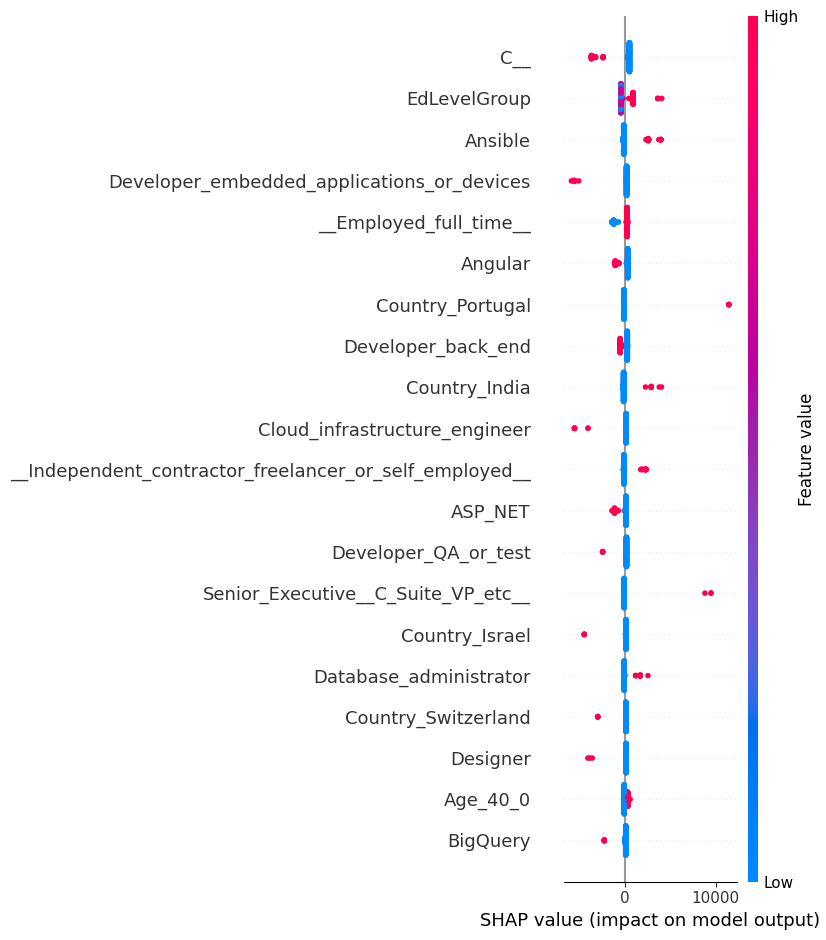

In [118]:
import shap

explainer = shap.Explainer(lgb_model, X_train)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val)


In [119]:
len(df1.columns)

384

In [120]:
# Tính toán giá trị SHAP trung bình

mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Xác định đặc trưng quan trọng (có thể thay đổi threshold tùy theo yêu cầu)
threshold = 0.2
important_features = np.where(mean_shap_values > threshold)[0]

# Chỉ giữ lại các đặc trưng quan trọng
X_train_filtered = X_train.iloc[:, important_features]

# Hiển thị các đặc trưng quan trọng
print("Important Features Index:", len(important_features))


Important Features Index: 113


In [121]:
X_val_filtered = X_val.iloc[:,important_features]

In [122]:
import lightgbm as lgb
X_train_temp = X_train_filtered
X_val_temp = X_val_filtered
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators= 800,learning_rate=0.1,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 62
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(max_depth=3, n_estimators=800, random_state=42)

In [123]:
lgb_model.fit(X_train_temp, y_train)

# Dự đoán trên tập validation
y_pred_lgb = lgb_model.predict(X_val_temp)

# Tính toán các chỉ số hiệu suất cho tập validation (E_new)
mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)


# Tính toán hiệu suất trên tập huấn luyện (E_train)
y_train_pred_lgb = lgb_model.predict(X_train_temp)

mae_train_lgb = mean_absolute_error(y_train, y_train_pred_lgb)
rmse_train_lgb = mean_squared_error(y_train, y_train_pred_lgb, squared=False)
r2_train_lgb = r2_score(y_train, y_train_pred_lgb)

# In ra các chỉ số trên tập huấn luyện (E_train)
print(f"MAE (Train): {mae_train_lgb}")
print(f"RMSE (Train): {rmse_train_lgb}")
print(f"R² (Train): {r2_train_lgb}")
print(f"MAE (Validation): {mae_lgb}")
print(f"RMSE (Validation): {rmse_lgb}")
print(f"R² (Validation): {r2_lgb}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 127
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 62
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<!-- import optuna
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 800),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 15, 127),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    }
    model = lgb.LGBMRegressor(**params, random_state=42)
    score = -cross_val_score(model, X_train_temp, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return np.sqrt(score) 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value) -->


In [124]:
# import lightgbm as lgb
# best_params = study.best_params
# best_model = lgb.LGBMRegressor(**best_params, random_state=42)
# best_model.fit(X_train_temp, y_train)

# y_pred = best_model.predict(X_val_temp)

# mae = mean_absolute_error(y_val, y_pred)
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# r2 = r2_score(y_val, y_pred)

# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")
# print(f"R²: {r2}")


**SVM**

SVM với Linear kernel

In [125]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')

svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_val)

# Đánh giá mô hình
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of SVM with Linear Kernel: {mae}')
print(f'RMSE of SVM with Linear Kernel: {rmse}')
print(f'R^2 of SVM with Linear Kernel: {r2}')


MAE of SVM with Linear Kernel: 34053.64300132088
RMSE of SVM with Linear Kernel: 43187.033873990076
R^2 of SVM with Linear Kernel: -0.005741568839355615


SVM với kernel rbf

In [126]:
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

# Dự đoán trên tập huấn luyện (E_train)
y_train_pred = svr.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 5227.897949444424
RMSE (Train): 14130.522951352526
R² (Train): 0.908189124715184
MAE (Validation): 20961.775849448997
RMSE (Validation): 27196.149039971253
R² (Validation): 0.6011638907363166


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [127]:
# import optuna
# def objective(trial):
 
#     C = trial.suggest_loguniform('C', 1e-2, 1e5)  # Tham số C
#     epsilon = trial.suggest_uniform('epsilon', 0.01, 0.1)  # Tham số epsilon
#     kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])  # Chọn loại kernel
    
#     # Tạo và huấn luyện mô hình SVR với các tham số tối ưu
#     svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
#     svr.fit(X_train, y_train)
    
#     # Dự đoán trên tập validation
#     y_pred = svr.predict(X_val)
    
#     # Tính các chỉ số đánh giá mô hình
#     mae = mean_absolute_error(y_val, y_pred)
#     rmse = mean_squared_error(y_val, y_pred, squared=False)
#     r2 = r2_score(y_val, y_pred)
    
#     # Hàm mục tiêu là MAE (có thể thay đổi thành RMSE hoặc R² tùy theo mục tiêu)
#     return mae

# # Tạo study và tối ưu hóa hyperparameters
# study = optuna.create_study(direction='minimize')  # Tối thiểu hóa MAE
# study.optimize(objective, n_trials=100)

# # In kết quả tối ưu
# print(f"Best trial: {study.best_trial.number}")
# print(f"Best value (MAE): {study.best_trial.value}")
# print(f"Best parameters: {study.best_trial.params}")

# # Sử dụng các tham số tối ưu cho mô hình cuối cùng
# best_params = study.best_trial.params
# svr_best = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])
# svr_best.fit(X_train, y_train)

# # Dự đoán và đánh giá với mô hình tốt nhất
# y_pred_best = svr_best.predict(X_val)
# mae_best = mean_absolute_error(y_val, y_pred_best)
# rmse_best = mean_squared_error(y_val, y_pred_best, squared=False)
# r2_best = r2_score(y_val, y_pred_best)

# # In kết quả với tham số tối ưu
# print(f"Optimized MAE: {mae_best}")
# print(f"Optimized RMSE: {rmse_best}")
# print(f"Optimized R²: {r2_best}")

SVM, kernerl rbf và LR

In [128]:
lr_model = LinearRegression()
svr_model = SVR(kernel='rbf', C=120000, epsilon=0.05)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

y_train_pred = stacking_model.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")


MAE (Train): 5097.381540023989
RMSE (Train): 12321.551262755285
R² (Train): 0.9301914793644217
MAE (Validation): 23483.09600198677
RMSE (Validation): 34646.45221684058
R² (Validation): 0.35271255229524734


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SVM, kernel rbf và theo bagging

In [129]:
from sklearn.ensemble import BaggingRegressor

In [130]:
# svr = SVR(kernel = "rbf", C =100000, epsilon = 0.05)
# bagging_svr = BaggingRegressor(
#     estimator=svr,    
#     n_estimators=100,       
#     max_samples=0.8,       
#     max_features=0.8,      
#     random_state=42,
#     n_jobs=-1              
# )

# bagging_svr.fit(X_train, y_train)

# y_pred = bagging_svr.predict(X_val)

# mae = mean_absolute_error(y_val, y_pred)
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# r2 = r2_score(y_val, y_pred)

# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")
# print(f"R²: {r2}")

In [131]:
rf_model = RandomForestRegressor(n_estimators=900, max_depth=15,random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_val)
y_train_pred = rf_model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


MAE (Train): 13725.108527249695
RMSE (Train): 17254.16562179444
R² (Train): 0.8631119354167532
MAE: 21470.98201014884
RMSE: 28491.28244551118
R²: 0.5622726912148521


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Gradient Boosting**

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('gbm', gbm_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = stacking_model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 9128.253369806118
RMSE (Train): 14520.94060558628
R² (Train): 0.9030456818826421
MAE: 21805.97691586499
RMSE: 29941.025731021746
R²: 0.5165929332702541


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


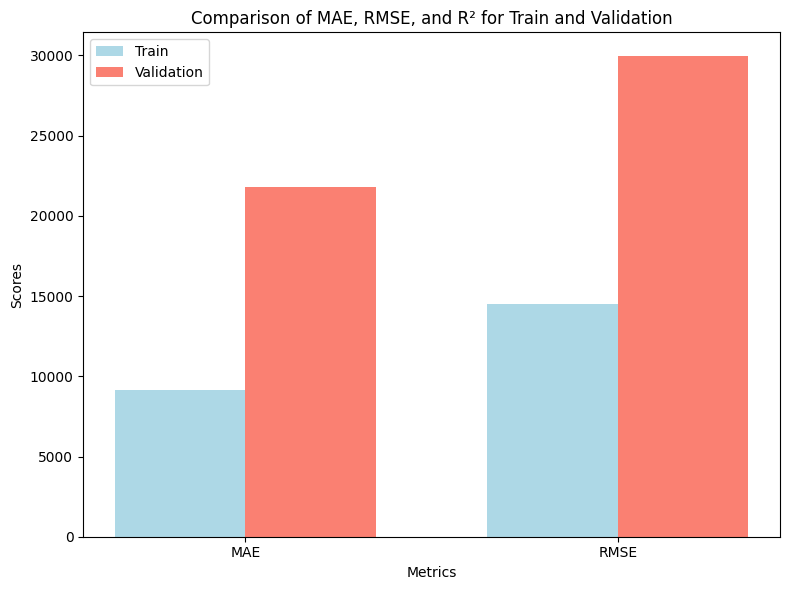

In [133]:
metrics = ['MAE', 'RMSE']
train_scores = [mae_train, rmse_train]
val_scores = [mae, rmse]
x = np.arange(len(metrics))  # vị trí của các metrics

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35  # chiều rộng của mỗi bar
ax.bar(x - bar_width/2, train_scores, bar_width, label='Train', color='lightblue')
ax.bar(x + bar_width/2, val_scores, bar_width, label='Validation', color='salmon')

# Thêm các chi tiết cho biểu đồ
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MAE, RMSE, and R² for Train and Validation')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

**XGBoost**

XGB

In [134]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=700, learning_rate=0.05, max_depth=3)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('xgb', xgb_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_train_pred = stacking_model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 10442.308476043505
RMSE (Train): 16218.802077164048
R² (Train): 0.8790474006057651
MAE (Validation): 21523.367869055382
RMSE (Validation): 29881.71557235759
R² (Validation): 0.5185061978959467


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGB + Random forest

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [136]:
xgb = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=700,
    subsample=0.5,
    random_state=42
)

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=3,
    random_state=42
)

meta_model = Ridge(alpha=0.1)

stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('rf', rf)
    ],
    final_estimator=meta_model
)

stacking_regressor.fit(X_train, y_train)

y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 19760.18375701333
RMSE: 26272.282134365374
R²: 0.627800963543286


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Trung bình theo trọng số cho XGB + GB

In [137]:

# weight_xgb = 0.8
# weight_gb = 0.2

# xgb.fit(X_train, y_train)
# gb_model.fit(X_train, y_train)

# y_pred_xgb = xgb_best.predict(X_val)
# y_pred_gb = gb_model.predict(X_val)

# y_pred_weighted = (weight_xgb * y_pred_xgb + weight_gb * y_pred_gb)

# mae_weighted = mean_absolute_error(y_val, y_pred_weighted)
# rmse_weighted = mean_squared_error(y_val, y_pred_weighted, squared=False)
# r2_weighted = r2_score(y_val, y_pred_weighted)

# print("Combined Model (Weighted Averaging):")
# print(f"MAE: {mae_weighted}")
# print(f"RMSE: {rmse_weighted}")
# print(f"R²: {r2_weighted}")


**LGB**

In [138]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=700, learning_rate=0.05,max_depth=3, random_state=42)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('lgb', lgb_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = stacking_model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE: (Validation){mae}")
print(f"RMSE: (Validation){rmse}")
print(f"R²: (Validation){r2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 200
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 9641.989732862867
RMSE (Train): 15711.70451246071
R² (Train): 0.8864925770040175
MAE: (Validation)22343.855500575522
RMSE: (Validation)32898.42255525785
R²: (Validation)0.4163804990604848


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Bayesian Regression**

In [139]:
from sklearn.linear_model import BayesianRidge
import numpy as np

model = BayesianRidge()
model.fit(X_train, y_train)
predicted_mean, predicted_std = model.predict(X_val, return_std=True)

# Tính các chỉ số đánh giá
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
y_train_pred = model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}")
print(f"R² (Train): {r2_train:.4f}")
# In kết quả
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2 score: {r2:.4f}")


MAE (Train): 20313.2343
RMSE (Train): 26982.3019
R² (Train): 0.6652
MAE: 22343.8555
MSE: 1082306206.6243
R^2 score: 0.4164


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Explainable Boosting Regression**

In [140]:
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.datasets import make_regression
model = ExplainableBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}")
print(f"R² (Train): {r2_train:.4f}")
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MAE (Validation): {mae:.4f}")
print(f"MSE(Validation): {mse:.4f}")
print(f"R^2 (Validation): {r2:.4f}")


MAE (Train): 17179.8265
RMSE (Train): 22951.0872
R² (Train): 0.7578
MAE (Validation): 20361.3726
MSE(Validation): 714449755.9005
R^2 (Validation): 0.6147


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**ElasticNet**

In [141]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.005, l1_ratio=0.01, random_state=42)  
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"Mean Squared Error (Validation): {mse}")
print(f"RMSE (Validation): {rmse}")
print(f"R² Score (Validation): {r2}")



MAE (Train): 20372.48787058033
RMSE (Train): 27055.982984816357
R² (Train): 0.6634076102669159
Mean Squared Error (Validation): 681938289.572599
RMSE (Validation): 26113.948180476254
R² Score (Validation): 0.6322736746809933


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**CatBoost**

CatBoost

In [142]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(iterations=1200, learning_rate=0.05, depth=3, silent=True)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('catboost', catboost_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = stacking_model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 11981.448887618284
RMSE (Train): 17637.310898097232
R² (Train): 0.8569649740740566
MAE (Validation): 21896.847590668884
RMSE (Validation): 31408.201617924602
R² (Validation): 0.46805615741840567


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoost + LR

In [143]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = model.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")

MAE (Train): 20372.48787058033
RMSE (Train): 27055.982984816357
R² (Train): 0.6634076102669159
MAE (Validation): 22107.726446855813
RMSE (Validation): 32708.690333106057
R² (Validation): 0.4230928038065591


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Kết hợp nhiều hơn 2 mô hình**

XGB + LR + SVM (kernel linear)

In [144]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lr = LinearRegression()
svr = SVR(kernel = "linear", C =100000, epsilon = 0.01)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr),
        ('svr', svr)
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)
y_train_pred = stacking_regressor.predict(X_train)

# Tính toán MAE, RMSE và R² cho tập huấn luyện (E_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE (Train): {mae_train}")
print(f"RMSE (Train): {rmse_train}")
print(f"R² (Train): {r2_train}")
print(f"MAE (Validation): {mae}")
print(f"RMSE (Validation): {rmse}")
print(f"R² (Validation): {r2}")

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.58531e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE (Train): 17117.602564605597
RMSE (Train): 23190.721001074646
R² (Train): 0.7527102244460647
MAE (Validation): 21367.192309664602
RMSE (Validation): 31647.876289205036
R² (Validation): 0.4599066991453219


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGB + LR + SVM (kernel rbf)

In [145]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lr = LinearRegression()
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr),
        ('svr', svr)
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.48717e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MAE: 21180.48778814144
RMSE: 30565.108163975674
R²: 0.4962309063168018


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGB + Ridge LR + LGBM

In [147]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lgb = LGBMRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state= 42)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lgb', lgb),
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 200
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [148]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lr = LinearRegression()
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
dt = DecisionTreeRegressor(max_depth = 3, random_state = 42)
lgb = LGBMRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state= 42)
catboost = CatBoostRegressor(n_estimators=500, learning_rate=0.01, depth=5, random_state=42, verbose=False)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr),
        ('svr', svr),
        ('dt', dt),
        ('lgb', lgb),
        ('catboost', catboost),
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 200
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.12052e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MAE: 21221.319727946582
RMSE: 31304.120167232726
R²: 0.4715758591562228


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge Regression

In [149]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=21)

ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of Ridge Regression: {mae}')
print(f'RMSE of Ridge Regression: {rmse}')
print(f'R^2 of Ridge Regression: {r2}')


MAE of Ridge Regression: 20428.23444107265
RMSE of Ridge Regression: 26583.393806315853
R^2 of Ridge Regression: 0.6189337415381516


In [150]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=900, learning_rate=0.05, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 20122.84287932982
RMSE: 26423.803890104347
R²: 0.6234953702954993


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [151]:
svr = SVR(kernel = "rbf", C =2500000, epsilon = 0.02)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 22958.340514186875
RMSE: 29481.183918857878
R²: 0.5313274840943927


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [152]:
import lightgbm as lgb
X_train_temp = X_train
X_val_temp = X_val
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=500,learning_rate=0.06,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 200
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


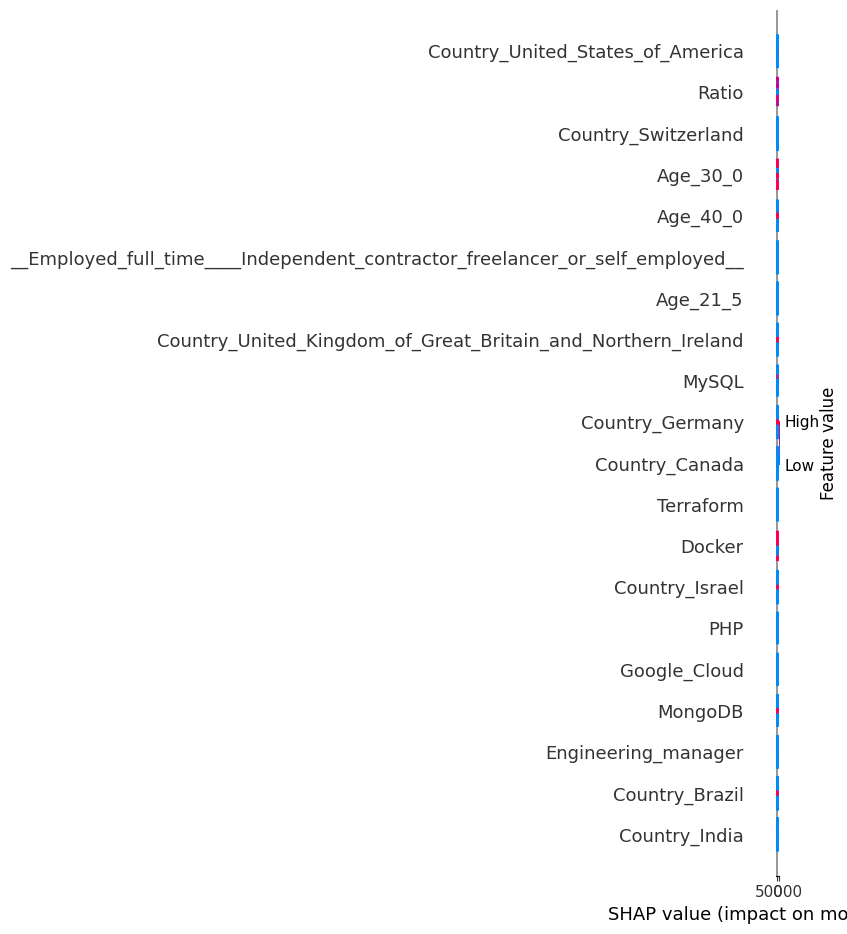

In [153]:
import shap

explainer = shap.Explainer(lgb_model, X_train)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val)


In [154]:
# Tính toán giá trị SHAP trung bình
mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Xác định đặc trưng quan trọng (có thể thay đổi threshold tùy theo yêu cầu)
threshold = 7
important_features = np.where(mean_shap_values > threshold)[0]

# Chỉ giữ lại các đặc trưng quan trọng
X_train_filtered = X_train.iloc[:, important_features]

# Hiển thị các đặc trưng quan trọng
print("Important Features Index:", len(important_features))


Important Features Index: 152


In [155]:
X_val_filtered = X_val.iloc[:,important_features]

In [156]:
import lightgbm as lgb
X_train_temp = X_train_filtered
X_val_temp = X_val_filtered
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=500,learning_rate=0.05,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 1992, number of used features: 152
[LightGBM] [Info] Start training from score 78095.849398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [157]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 3918149550154520.0
RMSE: 3.392078968191908e+16
R²: -6.204568079680366e+23


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


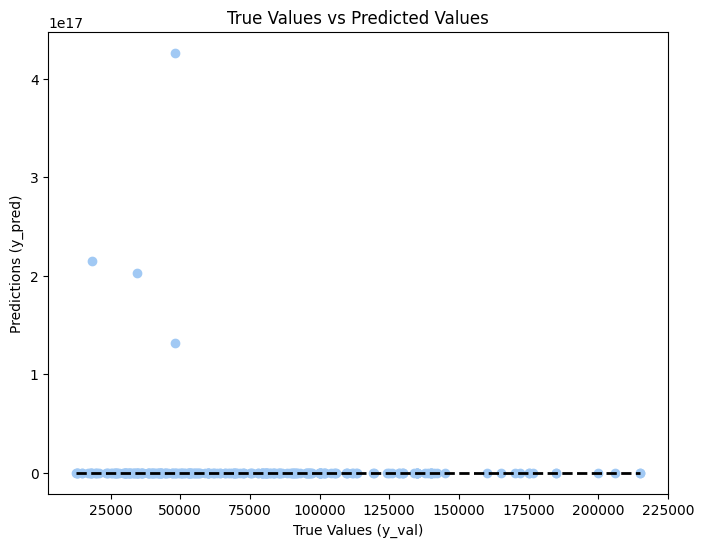

In [158]:
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('True Values (y_val)')
plt.ylabel('Predictions (y_pred)')
plt.title('True Values vs Predicted Values')
plt.show()


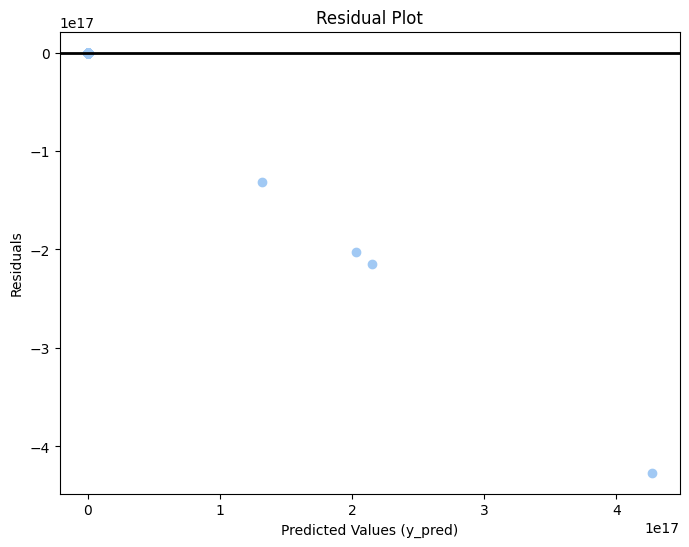

In [159]:
residuals = y_val - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='black', linewidth=2)
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

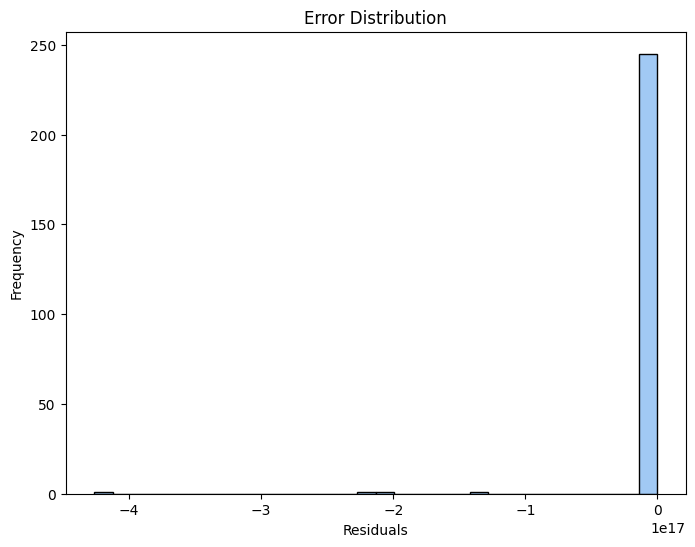

In [160]:
# Error Distribution (Histogram of residuals)
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

train_errors = []
val_errors = []

for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

# Plot Learning Curve
plt.plot(range(1, len(X_train)), train_errors, label='Train Error')
plt.plot(range(1, len(X_train)), val_errors, label='Validation Error')
plt.legend()
plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('MSE')
plt.show()


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.649e+05, tolerance: 7.454e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Thêm các mô hình khác

In [ ]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10,random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_val)

print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=900, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


In [ ]:
svr = SVR(kernel = "rbf", C =2000000,epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [ ]:
from sklearn.ensemble import BaggingRegressor
lr = LinearRegression()
bagging_regressor = BaggingRegressor(estimator=lr, n_estimators=200, random_state=42)

bagging_regressor.fit(X_train, y_train)
y_pred = bagging_regressor.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

-----------------------------------------------------------------------------------------------------------------------------------------